# Case Study - Leads Scoring

# Import Libaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


#supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing and Mergeing Data

In [2]:
#Importing all Datasets

df_leads = pd.read_csv("Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
df_leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

# <br>Inspecting the Dataframe

In [3]:
#Check the dimension of dataframe
df_leads.shape

(9240, 37)

In [4]:
#Look at the statistical aspects of the Dataframe
df_leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [5]:
#Type of each column
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Check missing values
df_leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

It is clearly seen, few columns have high number of missing values. It can be dropped if those columns are not useful and over 40% of missing values.

In [7]:
# Check for duplicate rows
print(df_leads.duplicated().sum())

0


There are not duplicate rows.

###  <br>Dataset Observations: <br>
__Dataset info__:    
- Number of variables: 37
- Number of observations: 9240
- Missing cells: 41039
- Missing cells (%): 41039

__Variables types__: 
- Numeric: 30
- Categorical:	7

# Data Cleaning and Preparation

According to Problem Statement, need to handle  'Select' level in many of the categorical variables because it is as good as a 'null' value. So, those values are needed to convert 'null' values.

In [8]:
# Check the columns 'Select' as value

cols_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [9]:
# Convert 'Select' values to NaN.
df_leads = df_leads.replace('Select', np.nan)

In [10]:
#% of missing values in df_leads
((df_leads.isnull().sum()/len(df_leads.index))*100).sort_values(ascending=False).round(decimals=3)

How did you hear about X Education               78.463
Lead Profile                                     74.188
Lead Quality                                     51.591
Asymmetrique Profile Score                       45.649
Asymmetrique Activity Score                      45.649
Asymmetrique Activity Index                      45.649
Asymmetrique Profile Index                       45.649
City                                             39.708
Specialization                                   36.580
Tags                                             36.288
What matters most to you in choosing a course    29.318
What is your current occupation                  29.113
Country                                          26.634
Page Views Per Visit                              1.483
TotalVisits                                       1.483
Last Activity                                     1.115
Lead Source                                       0.390
Receive More Updates About Our Courses          

## Drop columns more than 40% of missing values

In [11]:
#How did you hear about X Education               78.463
#Lead Profile                                     74.188
#Lead Quality                                     51.591
#Asymmetrique Profile Score                       45.649
#Asymmetrique Activity Score                      45.649
#Asymmetrique Activity Index                      45.649
#Asymmetrique Profile Index                       45.649

In [12]:
df_leads.drop(['How did you hear about X Education'
               ,'Lead Profile'
               ,'Lead Quality'
               ,'Asymmetrique Profile Score'
               ,'Asymmetrique Activity Score'
               ,'Asymmetrique Activity Index'
               ,'Asymmetrique Profile Index'],axis=1,inplace=True)

In [13]:
#% of missing values in df_leads after dropping >45% of missing vlaues
((df_leads.isnull().sum()/len(df_leads.index))*100).sort_values(ascending=False).round(decimals=3)

City                                             39.708
Specialization                                   36.580
Tags                                             36.288
What matters most to you in choosing a course    29.318
What is your current occupation                  29.113
Country                                          26.634
Page Views Per Visit                              1.483
TotalVisits                                       1.483
Last Activity                                     1.115
Lead Source                                       0.390
Through Recommendations                           0.000
Receive More Updates About Our Courses            0.000
Prospect ID                                       0.000
Newspaper                                         0.000
Update me on Supply Chain Content                 0.000
Get updates on DM Content                         0.000
I agree to pay the amount through cheque          0.000
A free copy of Mastering The Interview          

In [14]:
df_leads.shape

(9240, 30)

In [15]:
df_leads.describe() # Statistical Information 

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9103.000000  
mean               2.362820  
std                2.161418  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

In [16]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<br><b>Checking missing values</b>

In [17]:
#Checking missing values

#City                                             39.708
#Specialization                                   36.580
#Tags                                             36.288
#What matters most to you in choosing a course    29.318
#What is your current occupation                  29.113
#Country                                          26.634

In [18]:
print('Column: '+ 'City',"\n")
print(df_leads.City.value_counts(),"\n")
print("___"*30,"\n")
print(df_leads.City.describe(),"\n")
print("___"*30,"\n")
print(df_leads.City.isnull().sum(),"\n")

Column: City 

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64 

__________________________________________________________________________________________ 

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object 

__________________________________________________________________________________________ 

3669 



- 39.708% of missing values 
- Missing values with 'Mumbai' will be made more skewed in the model
- So, City column can be dropped

In [19]:
print('Column: '+ 'Specialization',"\n")
print(df_leads.Specialization.value_counts(),"\n")
print("___"*30,"\n")
print(df_leads.Specialization.describe(),"\n")
print("___"*30,"\n")
print(df_leads.Specialization.isnull().sum(),"\n")

Column: Specialization 

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64 

__________________________________________________________________________________________ 

count                   5860
unique                    18
top       Finance Management
freq                

- 36.580% (3380) of missing values 

In [20]:
print('Column: '+ 'Tags',"\n")
print(df_leads.Tags.value_counts(),"\n")
print("___"*30,"\n")
print(df_leads.Tags.describe(),"\n")
print("___"*30,"\n")
print(df_leads.Tags.isnull().sum(),"\n")

Column: Tags 

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12

- 36.288% of missing values 
- This column will not be useful in the model
- So, Tags column can be dropped

In [21]:
print('Column: '+ 'What matters most to you in choosing a course',"\n")
print(df_leads['What matters most to you in choosing a course'].value_counts(),"\n")
print("___"*30,"\n")
print(df_leads['What matters most to you in choosing a course'].describe(),"\n")
print("___"*30,"\n")
print(df_leads['What matters most to you in choosing a course'].isnull().sum(),"\n")

Column: What matters most to you in choosing a course 

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64 

__________________________________________________________________________________________ 

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object 

__________________________________________________________________________________________ 

2709 



- 29.318% of missing values 
- Missing values with 'Better Career Prospects' will be made more skewed in the model 
- This column will not be useful in the model
- So, 'What matters most to you in choosing a course' column can be dropped

In [22]:
print('Column: '+ 'What is your current occupation',"\n")
print(df_leads['What is your current occupation'].value_counts(),"\n")
print("___"*30,"\n")
print(df_leads['What is your current occupation'].describe(),"\n")
print("___"*30,"\n")
print(df_leads['What is your current occupation'].isnull().sum(),"\n")

Column: What is your current occupation 

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64 

__________________________________________________________________________________________ 

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object 

__________________________________________________________________________________________ 

2690 



- 29.113% (2690) of missing values 
- Missing values to be replaced with Unemployed 

In [23]:
# Missing values to be replaced with Unemployed
df_leads['What is your current occupation'].fillna(value='Unemployed', inplace=True)

In [24]:
print('Column: '+ 'Country',"\n")
print(df_leads['Country'].value_counts(),"\n")
print("___"*30,"\n")
print(df_leads['Country'].describe(),"\n")
print("___"*30,"\n")
print(df_leads['Country'].isnull().sum(),"\n")

Column: Country 

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                  

- 26.634% of missing values 
- Missing values with 'India' will be made more skewed in the model
- So, Country column can be dropped

## Drop columns not useful for model

In [25]:
#City
#Tags                                            
#What matters most to you in choosing a course
#Country 

In [26]:
df_leads.drop(['City'
               ,'Tags'
               ,'What matters most to you in choosing a course'              
               ,'Country'],axis=1,inplace=True)

In [27]:
#One unique value:

#I agree to pay the amount through cheque
#Get updates on DM Content
#Update me on Supply Chain Content
#Receive More Updates About Our Courses
#Magazine

In [28]:
df_leads.drop(['I agree to pay the amount through cheque'
                ,'Get updates on DM Content'
                ,'Update me on Supply Chain Content'
                ,'Receive More Updates About Our Courses'
                ,'Magazine'],axis=1,inplace=True)

In [29]:
#Checking unnecessary columns which are not useful for model
#Prospect ID
#Lead Number 
#Last Notable Activity

In [30]:
df_leads.drop(['Prospect ID'               
               ,'Lead Number'
               ,'Last Notable Activity'],axis=1,inplace=True)

In [31]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Do Not Call                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Specialization                          5860 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [32]:
# Missing values to be replaced with mode
df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].mode()[0], inplace=True)
df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].mode()[0], inplace=True)

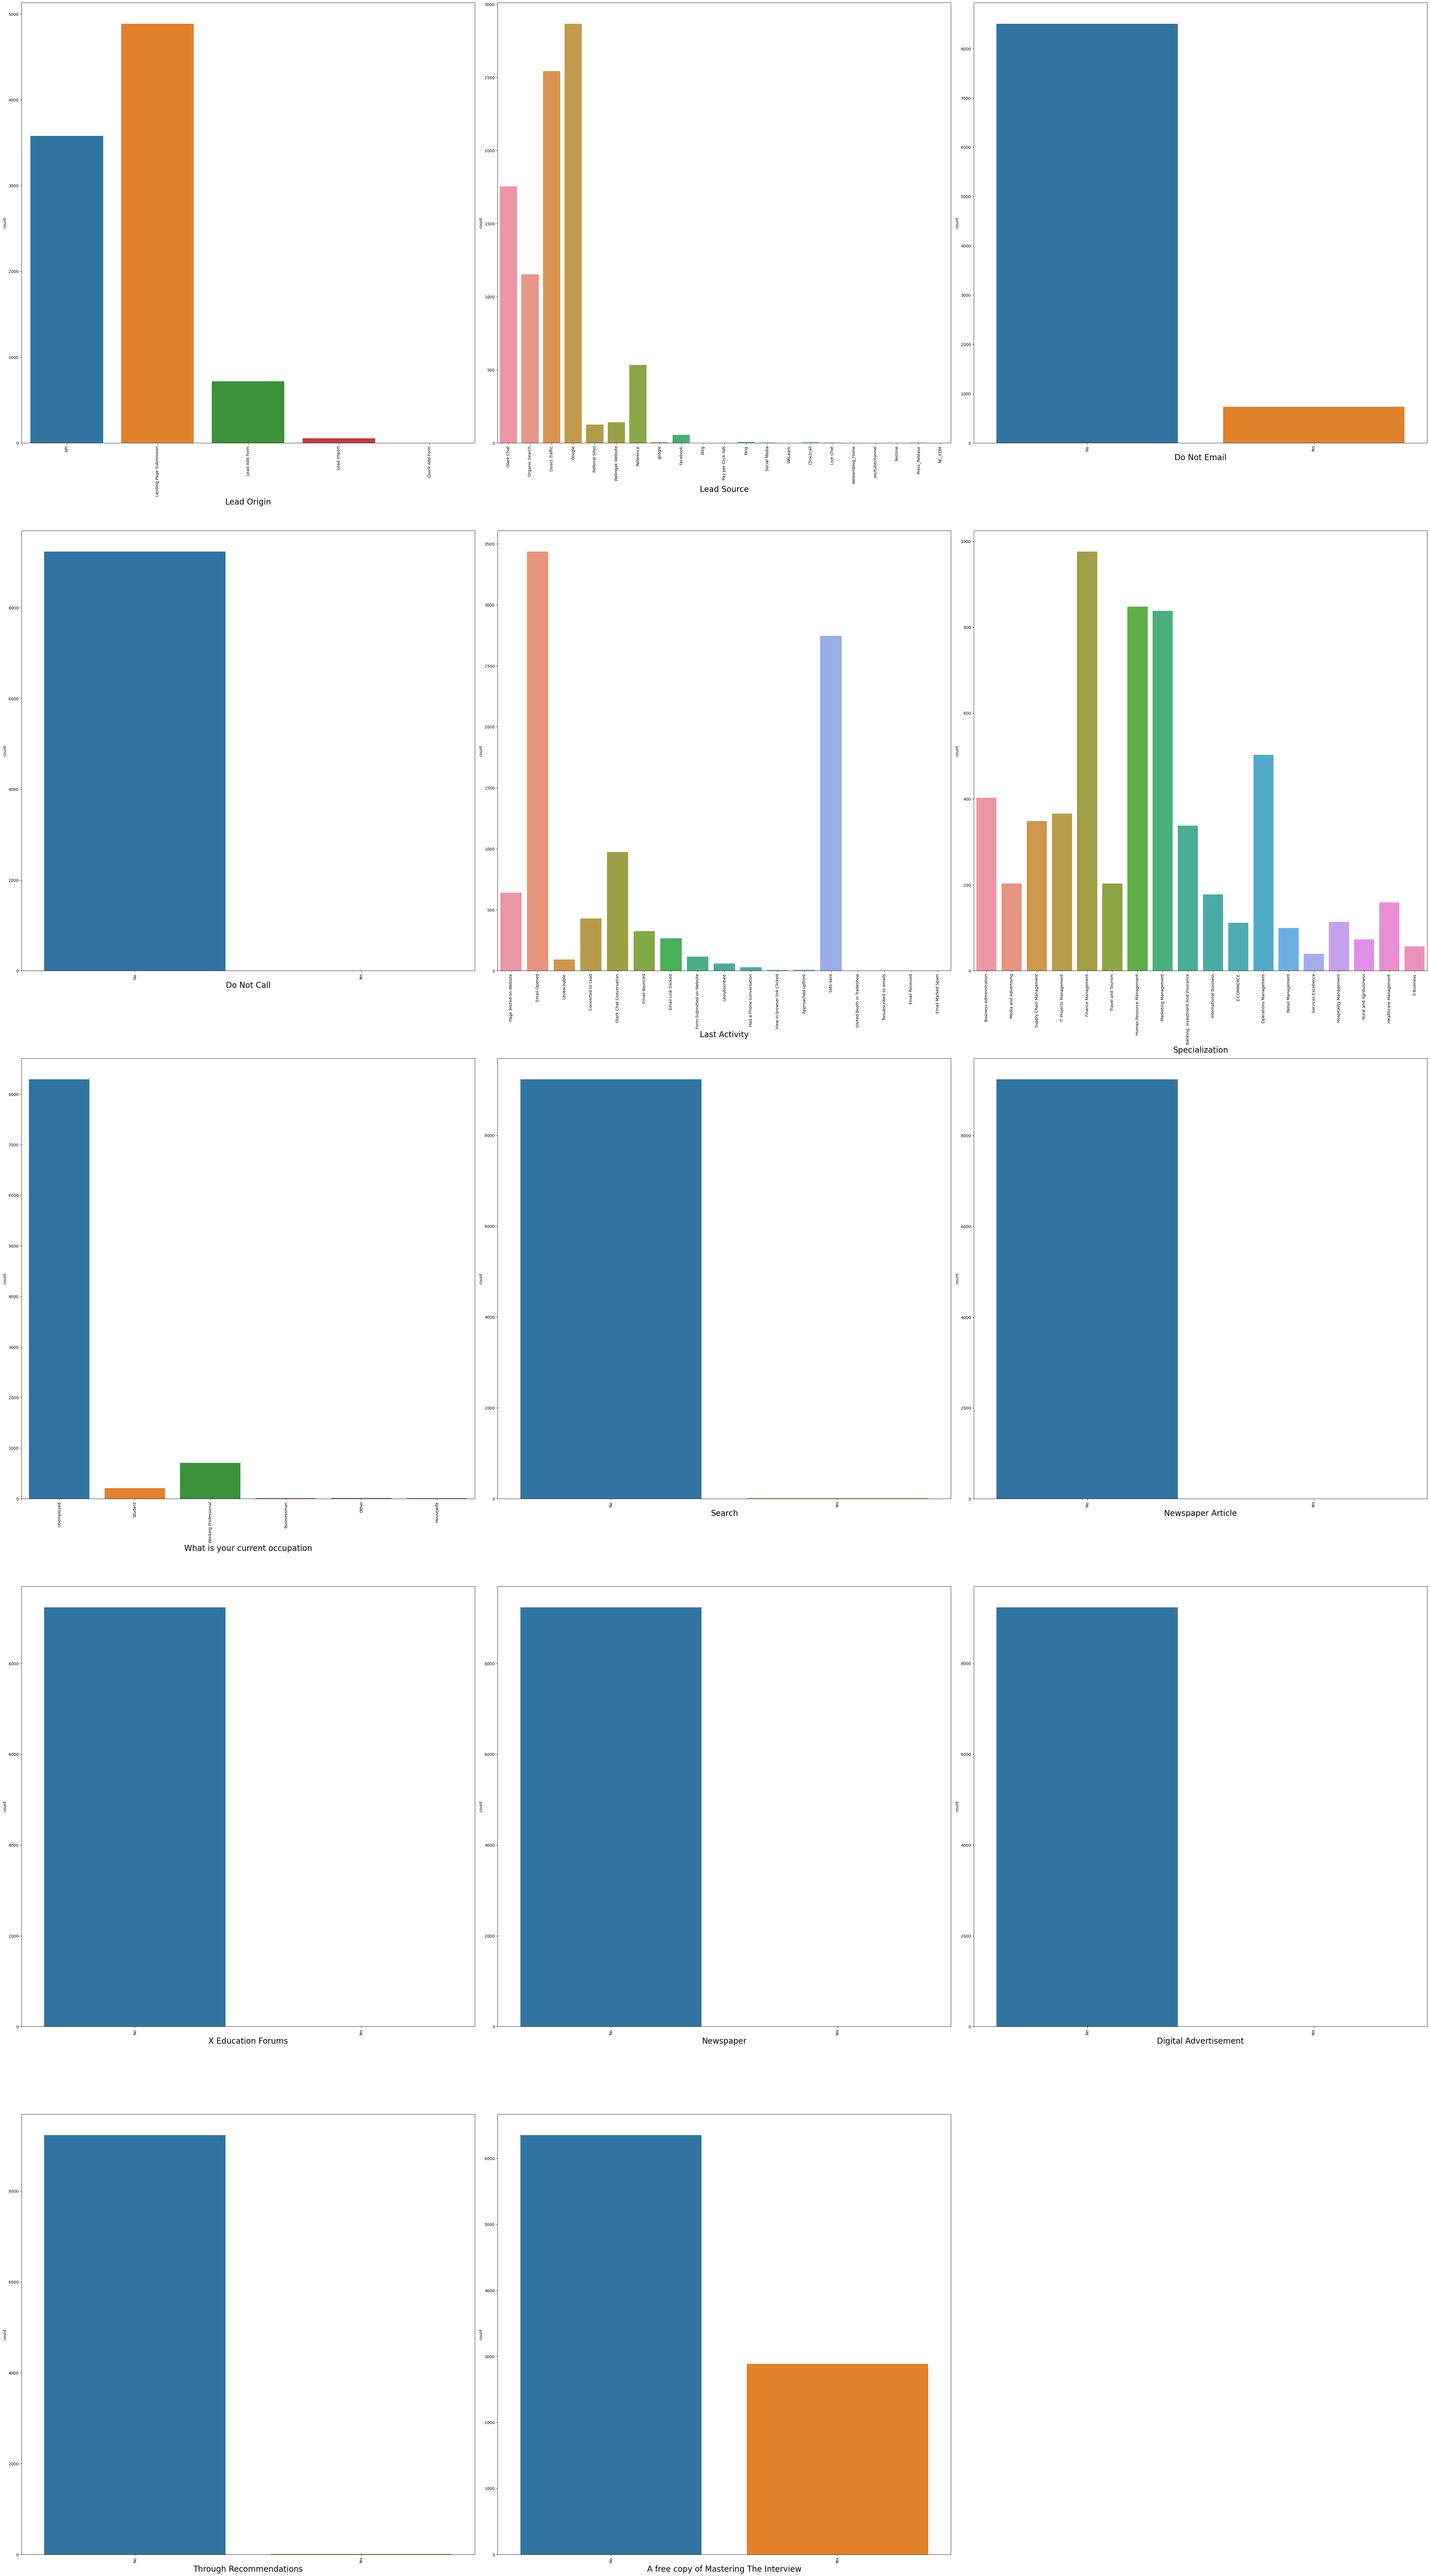

In [33]:
#Set categorical variable
cat_vars = [col for col in df_leads.columns if df_leads[col].dtype == 'object']

# let's see how data is distributed for every column
plt.figure(figsize=(50,90), facecolor='white')
plotnumber = 1
plt.subplots_adjust(wspace=.2,hspace=2)

for column in cat_vars:
    if plotnumber<= len(cat_vars) :
        ax = plt.subplot(5,3,plotnumber)
        sns.countplot(x = column,data = df_leads)
        plt.xlabel(column,fontsize=20)
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

In [34]:
# Dropping categorical columns with highly skewed data
#'Do Not Call',
#'Search', 
#'Newspaper Article',
#'X Education Forums',
#'Newspaper',
#'Digital Advertisement',
#Through Recommendations

In [35]:
df_leads.drop(['Do Not Call'
                ,'Search'
                ,'Newspaper Article'
                ,'X Education Forums'              
                ,'Newspaper'
                ,'Digital Advertisement'
                ,'Through Recommendations'],axis=1,inplace=True)

In [36]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9137 non-null   object 
 8   Specialization                          5860 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

<br><b>Define Target, Categorical and Numercial</b>

Create the list of categorical & numercial columns:\
Visualiinge the data and analyze the relationship between independent and dependent variables:

In [37]:
#Set the target variable
target_var = "converted"

In [38]:
#Set categorical variable
cat_vars = [col for col in df_leads.columns if df_leads[col].dtype == 'object']
print("List of categorical column names: ", cat_vars)

List of categorical column names:  ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview']


In [39]:
#Set numercial variable
num_vars = [col for col in df_leads.columns if df_leads[col].dtype != 'object']
print("List of numerical column names: ", num_vars)

List of numerical column names:  ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


In [40]:
#Set the **discrete variables
discrete_num_vars = [col for col in num_vars if df_leads[col].nunique() < 20]
print("List of discrete column names: ", discrete_num_vars)

List of discrete column names:  ['Converted']


In [41]:
#Set the continuous numerical variables

cont_num_vars = [col for col in num_vars if col not in discrete_num_vars and col != target_var]
print("List of continuous column names: ", cont_num_vars)

List of continuous column names:  ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


<br><b>Numerical variables</b>

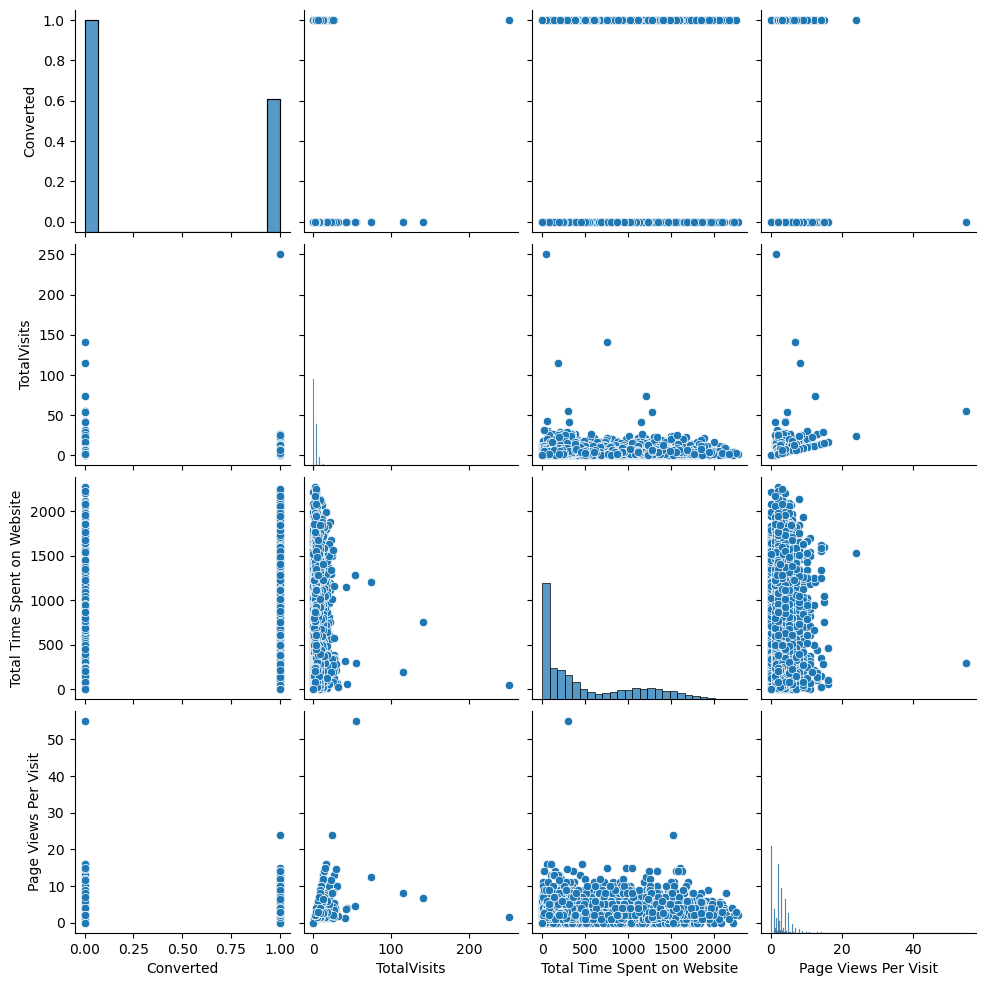

In [42]:
#pairplot for numerical variables
sns.pairplot(df_leads)
plt.show()

In [43]:
#Correlation with target variable 
corr_mat = df_leads.corr()
round(corr_mat,2)

Converted  TotalVisits  \
Converted                         1.00         0.02   
TotalVisits                       0.02         1.00   
Total Time Spent on Website       0.36         0.21   
Page Views Per Visit             -0.01         0.52   

                             Total Time Spent on Website  Page Views Per Visit  
Converted                                           0.36                 -0.01  
TotalVisits                                         0.21                  0.52  
Total Time Spent on Website                         1.00                  0.30  
Page Views Per Visit                                0.30                  1.00

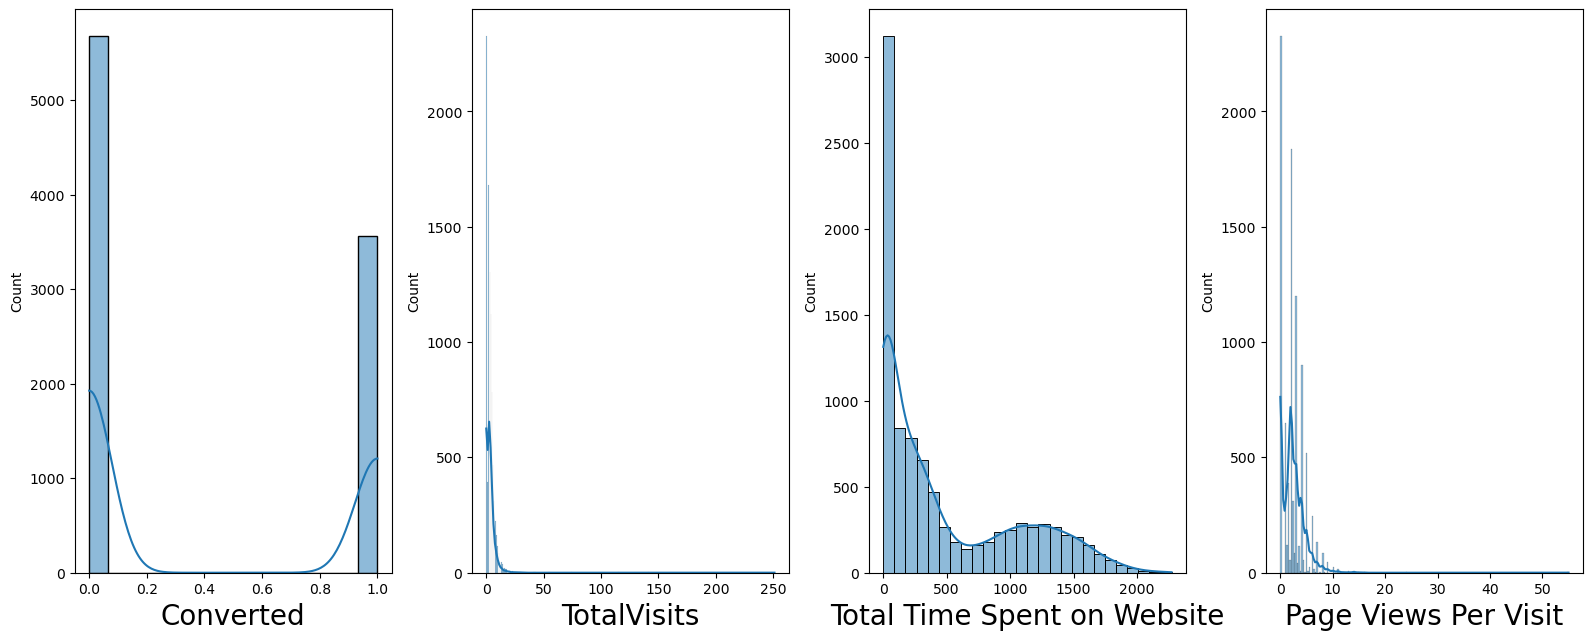

In [44]:
# let's see how numerical_features is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in num_vars:
    if plotnumber<=5 :
        ax = plt.subplot(4,5,plotnumber)
        sns.histplot(df_leads[column],kde = True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<br><b>Checking for Outliers</b>

In [45]:
cont_num_vars

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [46]:
#Checking for outliers in the continous varibles
num_leads= df_leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

In [47]:
num_leads.describe(percentiles=[.10,.25,.50,.75,.95])

TotalVisits  Total Time Spent on Website  Page Views Per Visit
count  9240.000000                  9240.000000           9240.000000
mean      3.394156                   487.698268              2.327787
std       4.836682                   548.021466              2.164258
min       0.000000                     0.000000              0.000000
10%       0.000000                     0.000000              0.000000
25%       0.000000                    12.000000              0.000000
50%       3.000000                   248.000000              2.000000
75%       5.000000                   936.000000              3.000000
95%      10.000000                  1562.000000              6.000000
max     251.000000                  2272.000000             55.000000

<br><b>TotalVisits</b>

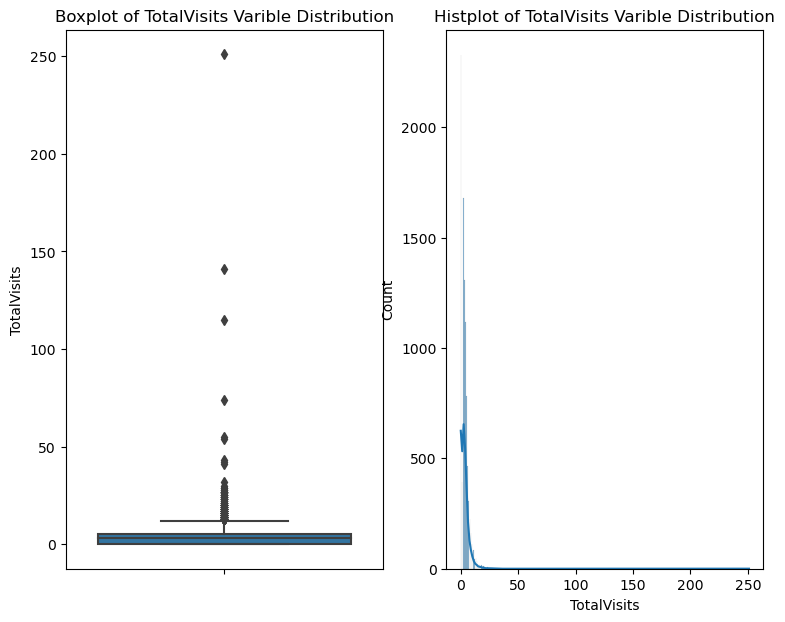

In [48]:
#TotalVisits Variable
plt.figure(figsize=(9,7))

plt.subplot(1,2,1)
sns.boxplot(y=df_leads['TotalVisits'])
plt.title ('Boxplot of TotalVisits Varible Distribution')

plt.subplot(1,2,2)
sns.histplot(df_leads['TotalVisits'], kde=True)
plt.title ('Histplot of TotalVisits Varible Distribution')

plt.show()

**TotalVisits** is extremely **skewed**, remove the value above **95 % quantitle** of the **TotalVisits**.

In [49]:
df_leads['TotalVisits'].shape

(9240,)

In [50]:
df_leads['TotalVisits'].describe()

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
25%         0.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [51]:
print(df_leads['TotalVisits'].skew())

19.864584134765995


In [52]:
#check IQR 
Q1 = df_leads['TotalVisits'].quantile(0.25)
Q3 = df_leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
print("IQR: ",IQR)

IQR:  5.0


In [53]:
df_TotalVisits_quantiles95 =df_leads['TotalVisits'].quantile(0.95)  # Calculate 95th percentiles
round(df_TotalVisits_quantiles95,3) 

10.0

In [54]:
df_leads["TotalVisits"] = np.where(df_leads["TotalVisits"] >10.0,10.0,df_leads['TotalVisits'])
print(df_leads['TotalVisits'].skew())

0.832753770952172


In [55]:
df_leads['TotalVisits'].describe()

count    9240.000000
mean        3.134740
std         2.787787
min         0.000000
25%         0.000000
50%         3.000000
75%         5.000000
max        10.000000
Name: TotalVisits, dtype: float64

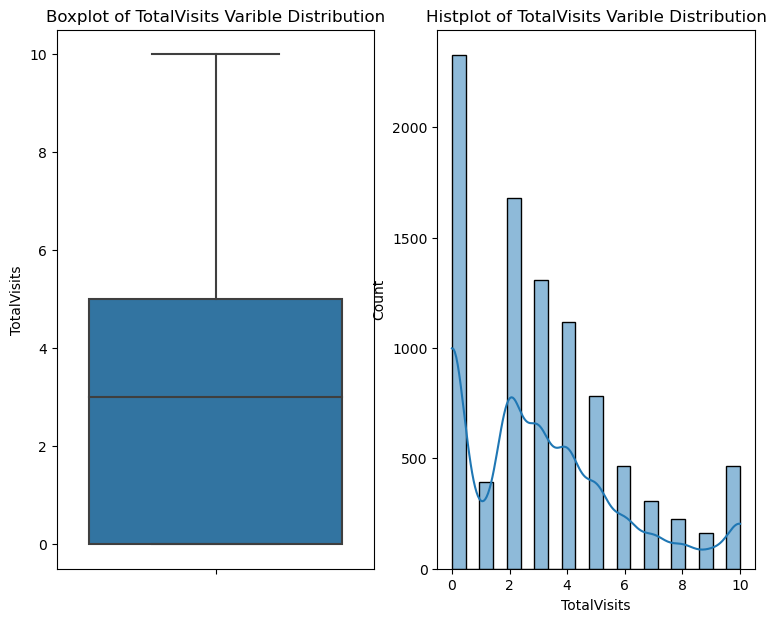

In [56]:
#TotalVisits Variable
plt.figure(figsize=(9,7))

plt.subplot(1,2,1)
sns.boxplot(y=df_leads['TotalVisits'])
plt.title ('Boxplot of TotalVisits Varible Distribution')

plt.subplot(1,2,2)
sns.histplot(df_leads['TotalVisits'], kde=True)
plt.title ('Histplot of TotalVisits Varible Distribution')

plt.show()

In [57]:
['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

<br><b>Total Time Spent on Website</b>

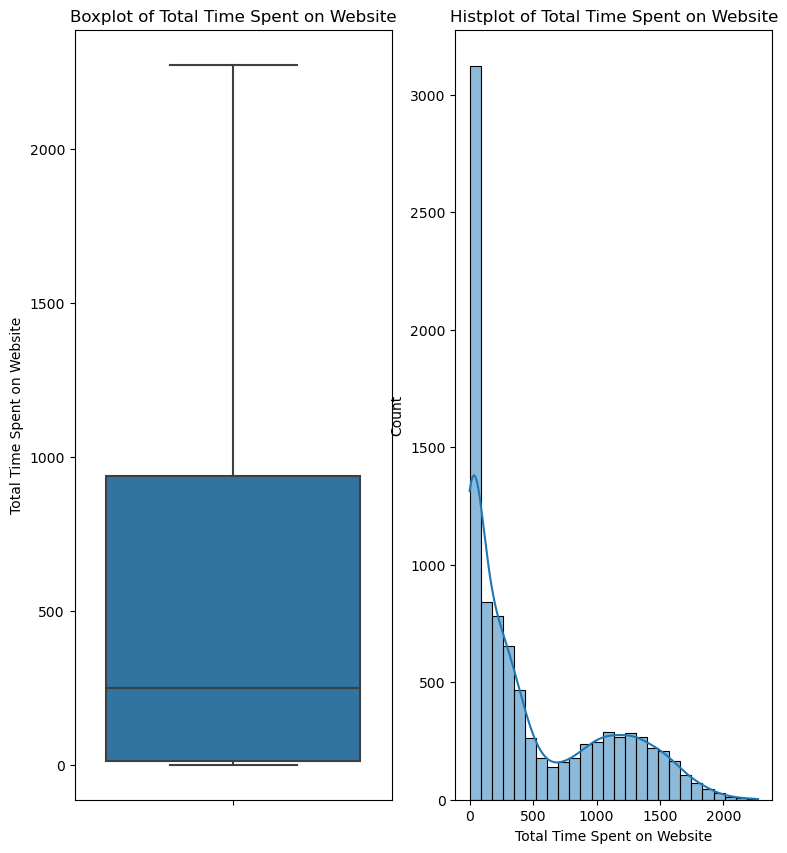

In [58]:
#Total Time Spent on Website Variable
plt.figure(figsize=(9,10))


plt.subplot(1,2,1)
sns.boxplot(y=df_leads['Total Time Spent on Website'])
plt.title ('Boxplot of Total Time Spent on Website')

plt.subplot(1,2,2)
sns.histplot(df_leads['Total Time Spent on Website'], kde=True)
plt.title ('Histplot of Total Time Spent on Website')

plt.show()

<br><b>Page Views Per Visit</b>

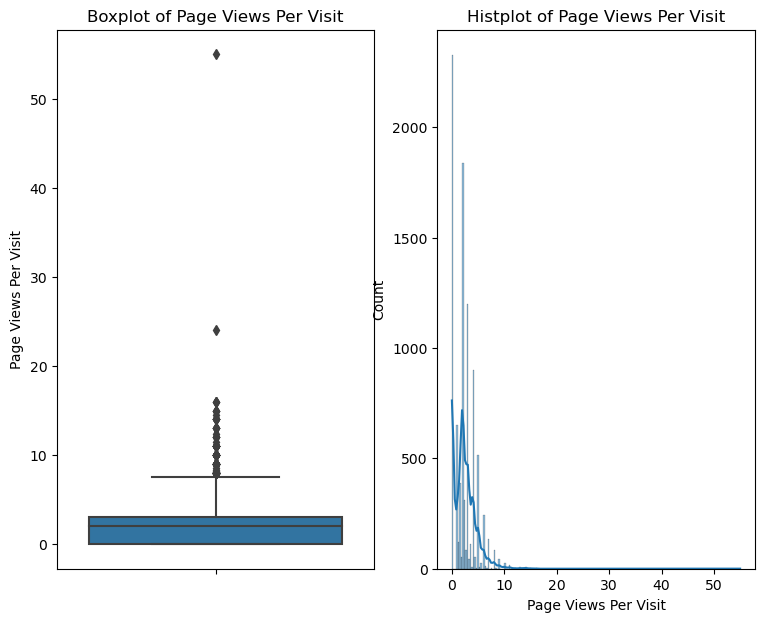

In [59]:
#Page Views Per Visit Variable
plt.figure(figsize=(9,7))

plt.subplot(1,2,1)
sns.boxplot(y=df_leads['Page Views Per Visit'])
plt.title ('Boxplot of Page Views Per Visit')

plt.subplot(1,2,2)
sns.histplot(df_leads['Page Views Per Visit'], kde=True)
plt.title ('Histplot of Page Views Per Visit')

plt.show()

**Page Views Per Visit** is extremely **skewed**, remove the value above **95 % quantitle** of the **TotalVisits**.

In [60]:
df_leads['Page Views Per Visit'].shape

(9240,)

In [61]:
df_leads['Page Views Per Visit'].describe()

count    9240.000000
mean        2.327787
std         2.164258
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [62]:
print(df_leads['Page Views Per Visit'].skew())

2.8473534521801844


In [63]:
#check IQR 
Q1 = df_leads['Page Views Per Visit'].quantile(0.25)
Q3 = df_leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
print("IQR: ",IQR)

IQR:  3.0


In [64]:
df_PageViewsPerVisit_quantiles95 =df_leads['Page Views Per Visit'].quantile(0.95)  # Calculate 95th percentiles
round(df_PageViewsPerVisit_quantiles95,3) 

6.0

In [65]:
df_leads['Page Views Per Visit'] = np.where(df_leads["Page Views Per Visit"] >6.0,6.0,df_leads['Page Views Per Visit'])
print(df_leads['Page Views Per Visit'].skew())

0.44671990076456075


In [66]:
df_leads['Page Views Per Visit'].describe()

count    9240.000000
mean        2.225451
std         1.800023
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Page Views Per Visit, dtype: float64

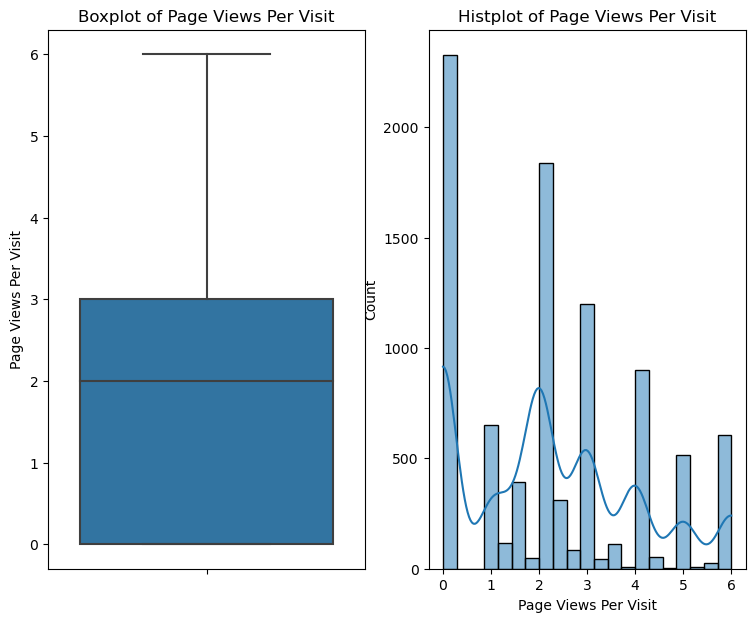

In [67]:
#Page Views Per Visit Variable
plt.figure(figsize=(9,7))

plt.subplot(1,2,1)
sns.boxplot(y=df_leads['Page Views Per Visit'])
plt.title ('Boxplot of Page Views Per Visit')

plt.subplot(1,2,2)
sns.histplot(df_leads['Page Views Per Visit'], kde=True)
plt.title ('Histplot of Page Views Per Visit')

plt.show()

<br><b>Categorical variable</b>

In [68]:
df_leads.isnull().sum()

Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                              103
Specialization                            3380
What is your current occupation              0
A free copy of Mastering The Interview       0
dtype: int64

In [69]:
cat_vars

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview']

In [70]:
print('Column: '+ 'Lead Origin',"\n")
print(df_leads['Lead Origin'].value_counts(),"\n")
print("___"*30,"\n")
print(df_leads['Lead Origin'].describe(),"\n")
print("___"*30,"\n")
print(df_leads['Lead Origin'].isnull().sum(),"\n")

Column: Lead Origin 

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

__________________________________________________________________________________________ 

count                        9240
unique                          5
top       Landing Page Submission
freq                         4886
Name: Lead Origin, dtype: object 

__________________________________________________________________________________________ 

0 



- 0 of missing values 
- Landing Page Submission is top 

In [71]:
print('Column: '+ 'Lead Source',"\n")
print(df_leads['Lead Source'].value_counts(),"\n")
print("___"*30,"\n")
print(df_leads['Lead Source'].describe(),"\n")
print("___"*30,"\n")
print(df_leads['Lead Source'].isnull().sum(),"\n")

Column: Lead Source 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64 

__________________________________________________________________________________________ 

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object 

__________________________________________________________________________________________ 

36 



- 36 of missing values 
- Google and google are same, so need to standardise.
- 'Others' column 

In [72]:
# Change google to Google
df_leads['Lead Source'] = df_leads['Lead Source'].replace("google","Google")

In [73]:
# Groupe <6 values to Others
df_leads['Lead Source'] = df_leads['Lead Source'].replace(["bing","Click2call"
                                                           ,"Social Media", "Live Chat","Press_Release"
                                                           , "Pay per Click Ads", "blog","WeLearn","welearnblog_Home"
                                                           , "youtubechannel","testone","NC_EDM"],"Others")

In [74]:
# Missing values to be replaced with Google
df_leads['Lead Source'].fillna(value='Google', inplace=True)

- 103 of missing values


In [75]:
print('Column: '+ 'Lead Source',"\n")
print(df_leads['Lead Source'].value_counts(),"\n")
print("___"*30,"\n")
print(df_leads['Lead Source'].describe(),"\n")
print("___"*30,"\n")
print(df_leads['Lead Source'].isnull().sum(),"\n")

Column: Lead Source 

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64 

__________________________________________________________________________________________ 

count       9240
unique         9
top       Google
freq        2909
Name: Lead Source, dtype: object 

__________________________________________________________________________________________ 

0 



In [76]:
print('Column: '+ 'Last Activity',"\n")
print(df_leads['Last Activity'].value_counts(),"\n")
print("___"*30,"\n")
print(df_leads['Last Activity'].describe(),"\n")
print("___"*30,"\n")
print(df_leads['Last Activity'].isnull().sum(),"\n")

Column: Last Activity 

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64 

__________________________________________________________________________________________ 

count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object 

_________________________________________________________________________________________

- 103 of missing values


In [77]:
# Grouping value levels to Others 
df_leads['Last Activity'] = df_leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [78]:
# Missing values to be replaced with Email Opened
df_leads['Last Activity'].fillna(value='Email Opened', inplace=True)

In [79]:
print('Column: '+ 'Last Activity',"\n")
print(df_leads['Last Activity'].value_counts(),"\n")
print("___"*30,"\n")
print(df_leads['Last Activity'].describe(),"\n")
print("___"*30,"\n")
print(df_leads['Last Activity'].isnull().sum(),"\n")

Column: Last Activity 

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64 

__________________________________________________________________________________________ 

count             9240
unique               9
top       Email Opened
freq              3540
Name: Last Activity, dtype: object 

__________________________________________________________________________________________ 

0 



In [80]:
print('Column: '+ 'Specialization',"\n")
print(df_leads['Specialization'].value_counts(),"\n")
print("___"*30,"\n")
print(df_leads['Specialization'].describe(),"\n")
print("___"*30,"\n")
print(df_leads['Specialization'].isnull().sum(),"\n")

Column: Specialization 

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64 

__________________________________________________________________________________________ 

count                   5860
unique                    18
top       Finance Management
freq                

- 3380  of missing values 


In [81]:
# Missing values to be replaced with Others
df_leads['Specialization'].fillna(value='Others', inplace=True)

In [82]:
print('Column: '+ 'Specialization',"\n")
print(df_leads['Specialization'].value_counts(),"\n")
print("___"*30,"\n")
print(df_leads['Specialization'].describe(),"\n")
print("___"*30,"\n")
print(df_leads['Specialization'].isnull().sum(),"\n")

Column: Specialization 

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64 

__________________________________________________________________________________________ 

count       9240
unique        19
top       Oth

In [83]:
print('Column: '+ 'What is your current occupation',"\n")
print(df_leads['What is your current occupation'].value_counts(),"\n")
print("___"*30,"\n")
print(df_leads['What is your current occupation'].describe(),"\n")
print("___"*30,"\n")
print(df_leads['What is your current occupation'].isnull().sum(),"\n")

Column: What is your current occupation 

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64 

__________________________________________________________________________________________ 

count           9240
unique             6
top       Unemployed
freq            8290
Name: What is your current occupation, dtype: object 

__________________________________________________________________________________________ 

0 



In [84]:
print('Column: '+ 'Do Not Email',"\n")
print(df_leads['Do Not Email'].value_counts(),"\n")
print("___"*30,"\n")
print(df_leads['Do Not Email'].describe(),"\n")
print("___"*30,"\n")
print(df_leads['Do Not Email'].isnull().sum(),"\n")

Column: Do Not Email 

No     8506
Yes     734
Name: Do Not Email, dtype: int64 

__________________________________________________________________________________________ 

count     9240
unique       2
top         No
freq      8506
Name: Do Not Email, dtype: object 

__________________________________________________________________________________________ 

0 



In [85]:
print('Column: '+ 'A free copy of Mastering The Interview',"\n")
print(df_leads['A free copy of Mastering The Interview'].value_counts(),"\n")
print("___"*30,"\n")
print(df_leads['A free copy of Mastering The Interview'].describe(),"\n")
print("___"*30,"\n")
print(df_leads['A free copy of Mastering The Interview'].isnull().sum(),"\n")

Column: A free copy of Mastering The Interview 

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64 

__________________________________________________________________________________________ 

count     9240
unique       2
top         No
freq      6352
Name: A free copy of Mastering The Interview, dtype: object 

__________________________________________________________________________________________ 

0 



In [86]:
cat_vars

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview']

<br><b>Converting some binary variables (Yes/No) to 0/1</b>

In [87]:
#Defining the map Function

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

In [88]:
#List of variables to map

varlist=['Do Not Email','A free copy of Mastering The Interview']

In [89]:
#Applying the function to the housing list
df_leads[varlist] = df_leads[varlist].apply(binary_map)

In [90]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   int64  
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   int6

In [91]:
df_leads.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3                   Others    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation  A free copy of Mastering The Interview  
0                      Unemployed                                       0  
1                      Unemployed                                       0  
2                         Student                                       1  
3                      Unemployed                                       0  
4                      Unemployed                                       0

# Rename column names and lower case

In [92]:
df_leads = df_leads.rename(columns={'Lead Origin': 'lead_origin'
                        , 'Lead Source': 'lead_source'
                        , 'Do Not Email': 'do_not_email'
                        ,'Total Time Spent on Website':'total_time_spent_website'
                        , 'Page Views Per Visit':'page_views'
                        ,'Last Activity': 'last_activity'           
                        ,'What is your current occupation': 'Current_occupation'
                        ,'A free copy of Mastering The Interview': 'Free_copy'                        
                        })

In [93]:
# rename Pandas columns to lower case
df_leads.columns= df_leads.columns.str.lower()

In [94]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_origin               9240 non-null   object 
 1   lead_source               9240 non-null   object 
 2   do_not_email              9240 non-null   int64  
 3   converted                 9240 non-null   int64  
 4   totalvisits               9240 non-null   float64
 5   total_time_spent_website  9240 non-null   int64  
 6   page_views                9240 non-null   float64
 7   last_activity             9240 non-null   object 
 8   specialization            9240 non-null   object 
 9   current_occupation        9240 non-null   object 
 10  free_copy                 9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


In [95]:
#Set the target variable
target_var = "converted"

In [96]:
#Set categorical variable
cat_vars = [col for col in df_leads.columns if df_leads[col].dtype == 'object']
print("List of categorical column names: ", cat_vars)

List of categorical column names:  ['lead_origin', 'lead_source', 'last_activity', 'specialization', 'current_occupation']


In [97]:
#Set numercial variable
num_vars = [col for col in df_leads.columns if df_leads[col].dtype != 'object']
print("List of numerical column names: ", num_vars)

List of numerical column names:  ['do_not_email', 'converted', 'totalvisits', 'total_time_spent_website', 'page_views', 'free_copy']


In [98]:
#Set the **discrete variables
discrete_num_vars = [col for col in num_vars if df_leads[col].nunique() < 20]
print("List of discrete column names: ", discrete_num_vars)

List of discrete column names:  ['do_not_email', 'converted', 'totalvisits', 'free_copy']


In [99]:
#Set the continuous numerical variables

cont_num_vars = [col for col in num_vars if col not in discrete_num_vars and col != target_var]
print("List of continuous column names: ", cont_num_vars)

List of continuous column names:  ['total_time_spent_website', 'page_views']


# Dummy Variables

In [100]:
#Other categorical vars to  dummy vars 
# more than 3 categories

In [101]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_origin               9240 non-null   object 
 1   lead_source               9240 non-null   object 
 2   do_not_email              9240 non-null   int64  
 3   converted                 9240 non-null   int64  
 4   totalvisits               9240 non-null   float64
 5   total_time_spent_website  9240 non-null   int64  
 6   page_views                9240 non-null   float64
 7   last_activity             9240 non-null   object 
 8   specialization            9240 non-null   object 
 9   current_occupation        9240 non-null   object 
 10  free_copy                 9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


In [102]:
df_leads.shape

(9240, 11)

In [103]:
df_leads = pd.get_dummies(data=df_leads,columns=["lead_origin","lead_source","last_activity",'specialization', 'current_occupation'],drop_first=True)

In [104]:
df_leads.shape

(9240, 49)

In [105]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   do_not_email                              9240 non-null   int64  
 1   converted                                 9240 non-null   int64  
 2   totalvisits                               9240 non-null   float64
 3   total_time_spent_website                  9240 non-null   int64  
 4   page_views                                9240 non-null   float64
 5   free_copy                                 9240 non-null   int64  
 6   lead_origin_Landing Page Submission       9240 non-null   uint8  
 7   lead_origin_Lead Add Form                 9240 non-null   uint8  
 8   lead_origin_Lead Import                   9240 non-null   uint8  
 9   lead_origin_Quick Add Form                9240 non-null   uint8  
 10  lead_source_Facebook                

In [106]:
#Checking the percentage of missing values after removing the missing values
round(100*(df_leads.isnull().sum()/len(df_leads.index)),2)

do_not_email                                0.0
converted                                   0.0
totalvisits                                 0.0
total_time_spent_website                    0.0
page_views                                  0.0
free_copy                                   0.0
lead_origin_Landing Page Submission         0.0
lead_origin_Lead Add Form                   0.0
lead_origin_Lead Import                     0.0
lead_origin_Quick Add Form                  0.0
lead_source_Facebook                        0.0
lead_source_Google                          0.0
lead_source_Olark Chat                      0.0
lead_source_Organic Search                  0.0
lead_source_Others                          0.0
lead_source_Reference                       0.0
lead_source_Referral Sites                  0.0
lead_source_Welingak Website                0.0
last_activity_Email Bounced                 0.0
last_activity_Email Link Clicked            0.0
last_activity_Email Opened              

Now no more missing values.

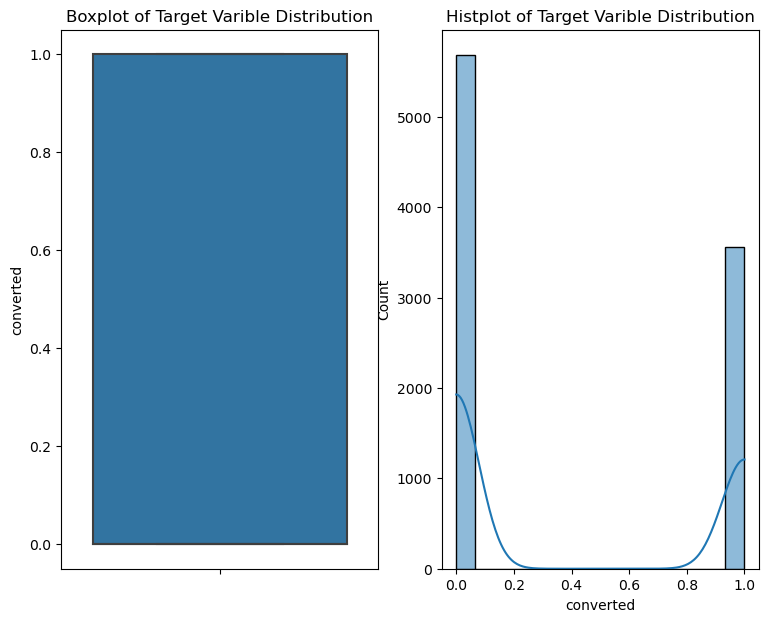

In [107]:
#Target Variable
plt.figure(figsize=(9,7))


plt.subplot(1,2,1)
sns.boxplot(y=df_leads['converted'])
plt.title ('Boxplot of Target Varible Distribution')

plt.subplot(1,2,2)
sns.histplot(df_leads['converted'], kde=True)
plt.title ('Histplot of Target Varible Distribution')


plt.show()

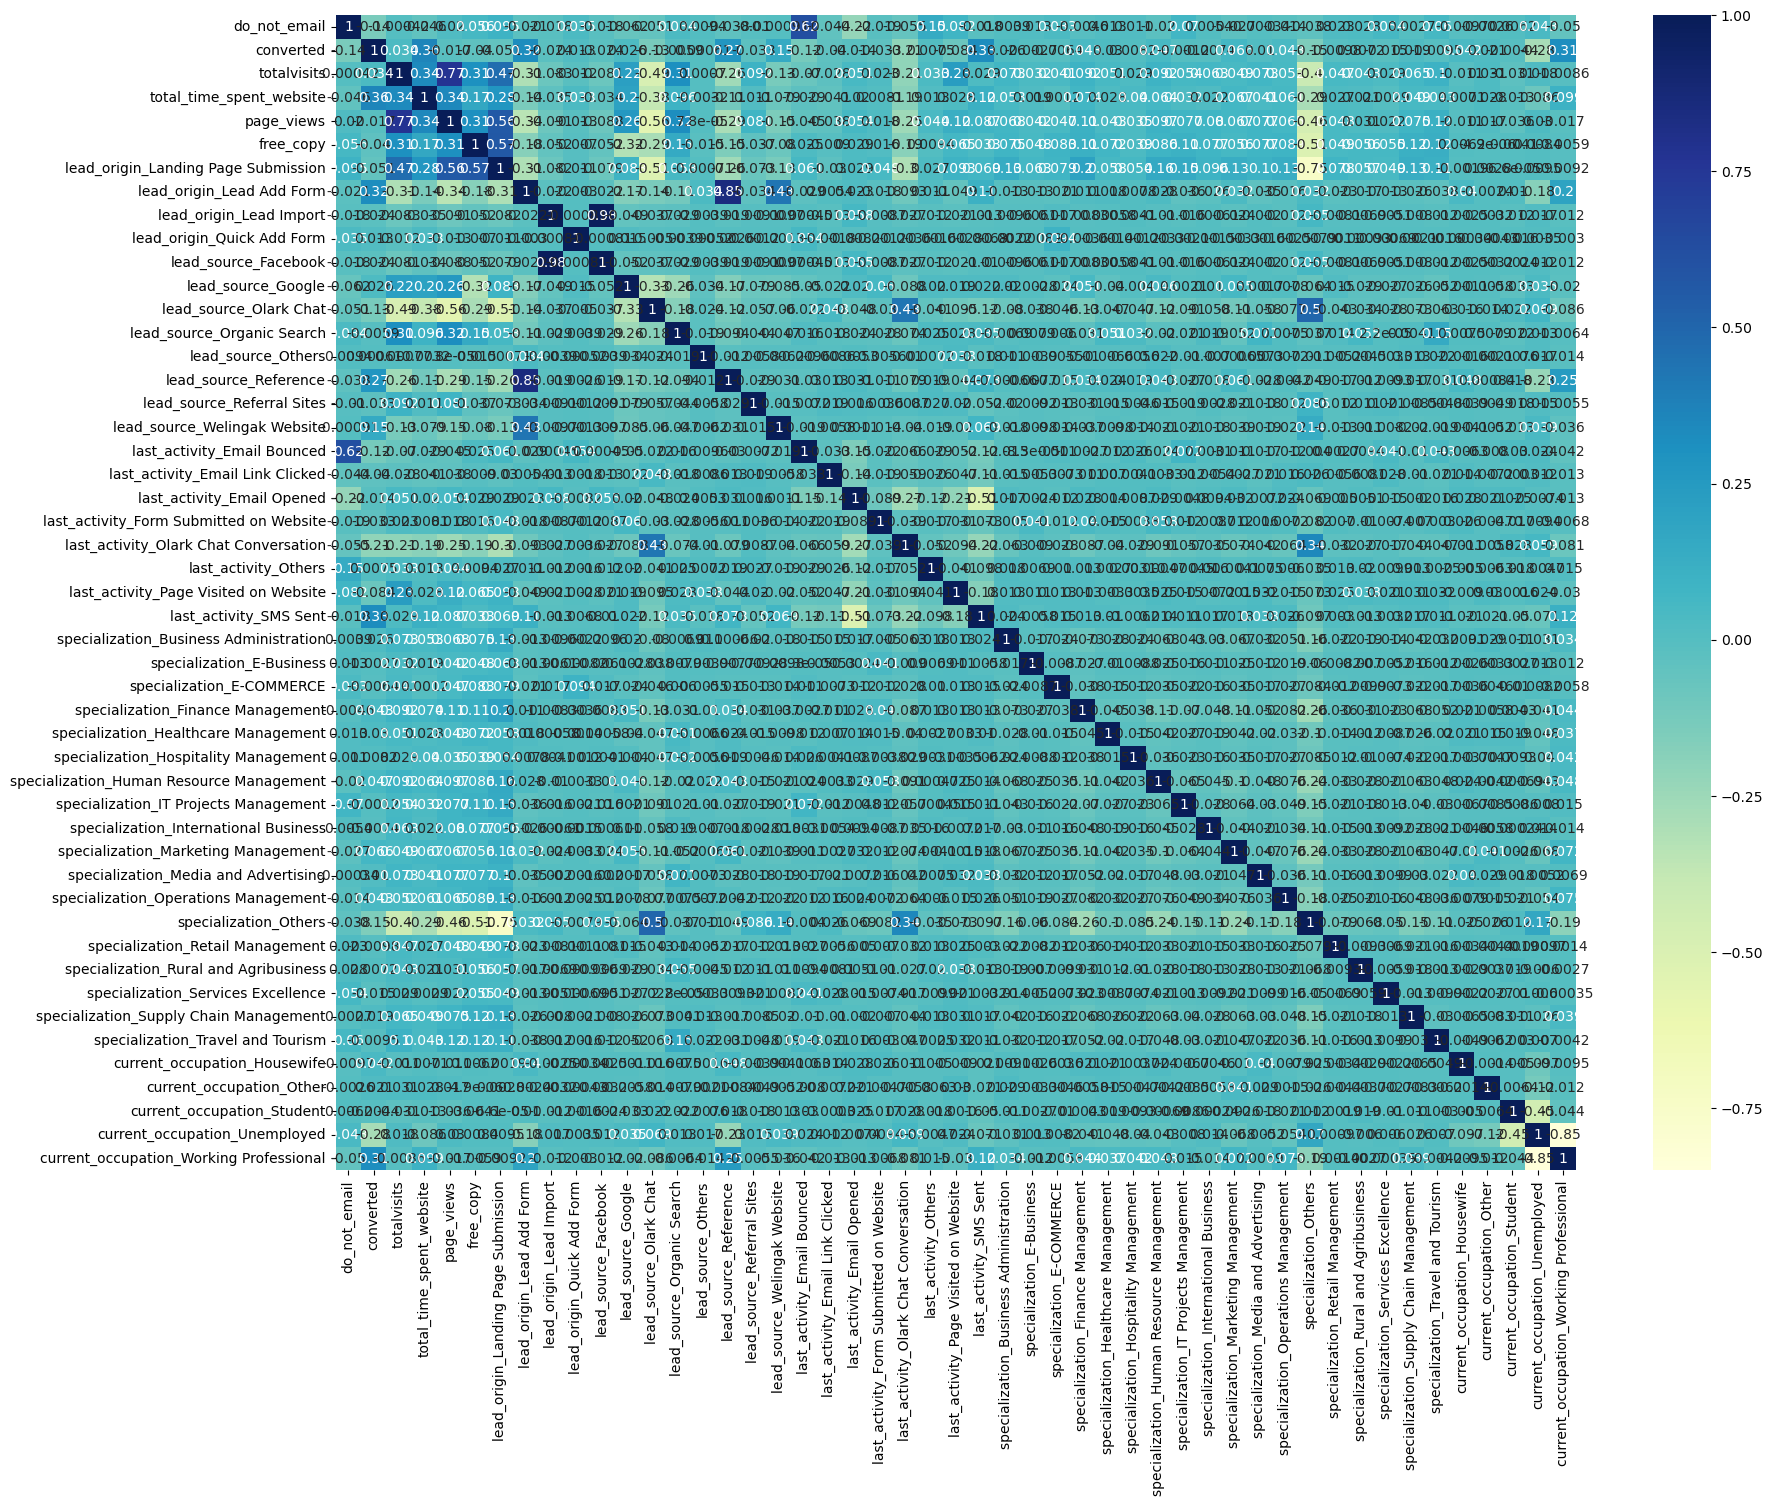

In [108]:
#heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df_leads.corr(),annot=True, cmap='YlGnBu', fmt=".2g")
plt.show()

# Data Split ( Train , Test)

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
df_leads.head()

do_not_email  converted  totalvisits  total_time_spent_website  page_views  \
0             0          0          0.0                         0         0.0   
1             0          0          5.0                       674         2.5   
2             0          1          2.0                      1532         2.0   
3             0          0          1.0                       305         1.0   
4             0          1          2.0                      1428         1.0   

   free_copy  lead_origin_Landing Page Submission  lead_origin_Lead Add Form  \
0          0                                    0                          0   
1          0                                    0                          0   
2          1                                    1                          0   
3          0                                    1                          0   
4          0                                    1                          0   

   lead_origin_Lead Import  lead_origin_Quick Add Form  ...  \
0                        0                           0  ...   
1                        0                           0  ...   
2                        0                           0  ...   
3                        0                           0  ...   
4                        0                           0  ...   

   specialization_Retail Management  specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   specialization_Services Excellence  specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   specialization_Travel and Tourism  current_occupation_Housewife  \
0                                  0                             0   
1                                  0                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   

   current_occupation_Other  current_occupation_Student  \
0                         0                           0   
1                         0                           0   
2                         0                           1   
3                         0                           0   
4                         0                           0   

   current_occupation_Unemployed  current_occupation_Working Professional  
0                              1                                        0  
1                              1                                        0  
2                              0                                        0  
3                              1                                        0  
4                              1                                        0  

[5 rows x 49 columns]

In [111]:
#Putting feature variable to X
X = df_leads.drop(['converted'],axis =1)

X.head()

do_not_email  totalvisits  total_time_spent_website  page_views  free_copy  \
0             0          0.0                         0         0.0          0   
1             0          5.0                       674         2.5          0   
2             0          2.0                      1532         2.0          1   
3             0          1.0                       305         1.0          0   
4             0          2.0                      1428         1.0          0   

   lead_origin_Landing Page Submission  lead_origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   lead_origin_Lead Import  lead_origin_Quick Add Form  lead_source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           0                     0   
3                        0                           0                     0   
4                        0                           0                     0   

   ...  specialization_Retail Management  \
0  ...                                 0   
1  ...                                 0   
2  ...                                 0   
3  ...                                 0   
4  ...                                 0   

   specialization_Rural and Agribusiness  specialization_Services Excellence  \
0                                      0                                   0   
1                                      0                                   0   
2                                      0                                   0   
3                                      0                                   0   
4                                      0                                   0   

   specialization_Supply Chain Management  specialization_Travel and Tourism  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   

   current_occupation_Housewife  current_occupation_Other  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   

   current_occupation_Student  current_occupation_Unemployed  \
0                           0                              1   
1                           0                              1   
2                           1                              0   
3                           0                              1   
4                           0                              1   

   current_occupation_Working Professional  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0  

[5 rows x 48 columns]

In [112]:
#Putting resonse variable to y
y = df_leads['converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [113]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

# Feautre Scaling

In [114]:
#Rescaling of variables

#1. Min~Max scaling (normalisation)  between 0 and 1
#2. Standardisation (mean-0, sigma-1)

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
num_vars

['do_not_email',
 'converted',
 'totalvisits',
 'total_time_spent_website',
 'page_views',
 'free_copy']

In [117]:
scaler = StandardScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
X_train [['totalvisits', 'total_time_spent_website', 'page_views']] = scaler.fit_transform(X_train[['totalvisits', 'total_time_spent_website', 'page_views']])

X_train.head()

do_not_email  totalvisits  total_time_spent_website  page_views  \
1871             0    -1.121955                 -0.885371   -1.234699   
6795             0     0.313260                  0.005716   -0.493295   
3516             0     0.672063                 -0.691418    0.158918   
8105             0     0.672063                  1.365219    1.552535   
3934             0    -1.121955                 -0.885371   -1.234699   

      free_copy  lead_origin_Landing Page Submission  \
1871          0                                    0   
6795          1                                    1   
3516          0                                    0   
8105          0                                    1   
3934          0                                    0   

      lead_origin_Lead Add Form  lead_origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      lead_origin_Quick Add Form  lead_source_Facebook  ...  \
1871                           0                     0  ...   
6795                           0                     0  ...   
3516                           0                     0  ...   
8105                           0                     0  ...   
3934                           0                     0  ...   

      specialization_Retail Management  specialization_Rural and Agribusiness  \
1871                                 0                                      0   
6795                                 0                                      0   
3516                                 0                                      0   
8105                                 0                                      0   
3934                                 0                                      0   

      specialization_Services Excellence  \
1871                                   0   
6795                                   0   
3516                                   0   
8105                                   1   
3934                                   0   

      specialization_Supply Chain Management  \
1871                                       0   
6795                                       0   
3516                                       0   
8105                                       0   
3934                                       0   

      specialization_Travel and Tourism  current_occupation_Housewife  \
1871                                  0                             0   
6795                                  0                             0   
3516                                  0                             0   
8105                                  0                             0   
3934                                  0                             0   

      current_occupation_Other  current_occupation_Student  \
1871                         0                           0   
6795                         0                           0   
3516                         0                           0   
8105                         0                           0   
3934                         0                           0   

      current_occupation_Unemployed  current_occupation_Working Professional  
1871                              1                                        0  
6795                              1                                        0  
3516                              1                                        0  
8105                              1                                        0  
3934                              1                                        0  

[5 rows x 48 columns]

In [118]:
#Checking the Converted Rate

converted = (sum(df_leads['converted'])/len(df_leads['converted'].index))*100
converted

38.53896103896104

Around 38.5% Converted rate

# Looking at Correlations

In [119]:
#Importing matplotib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

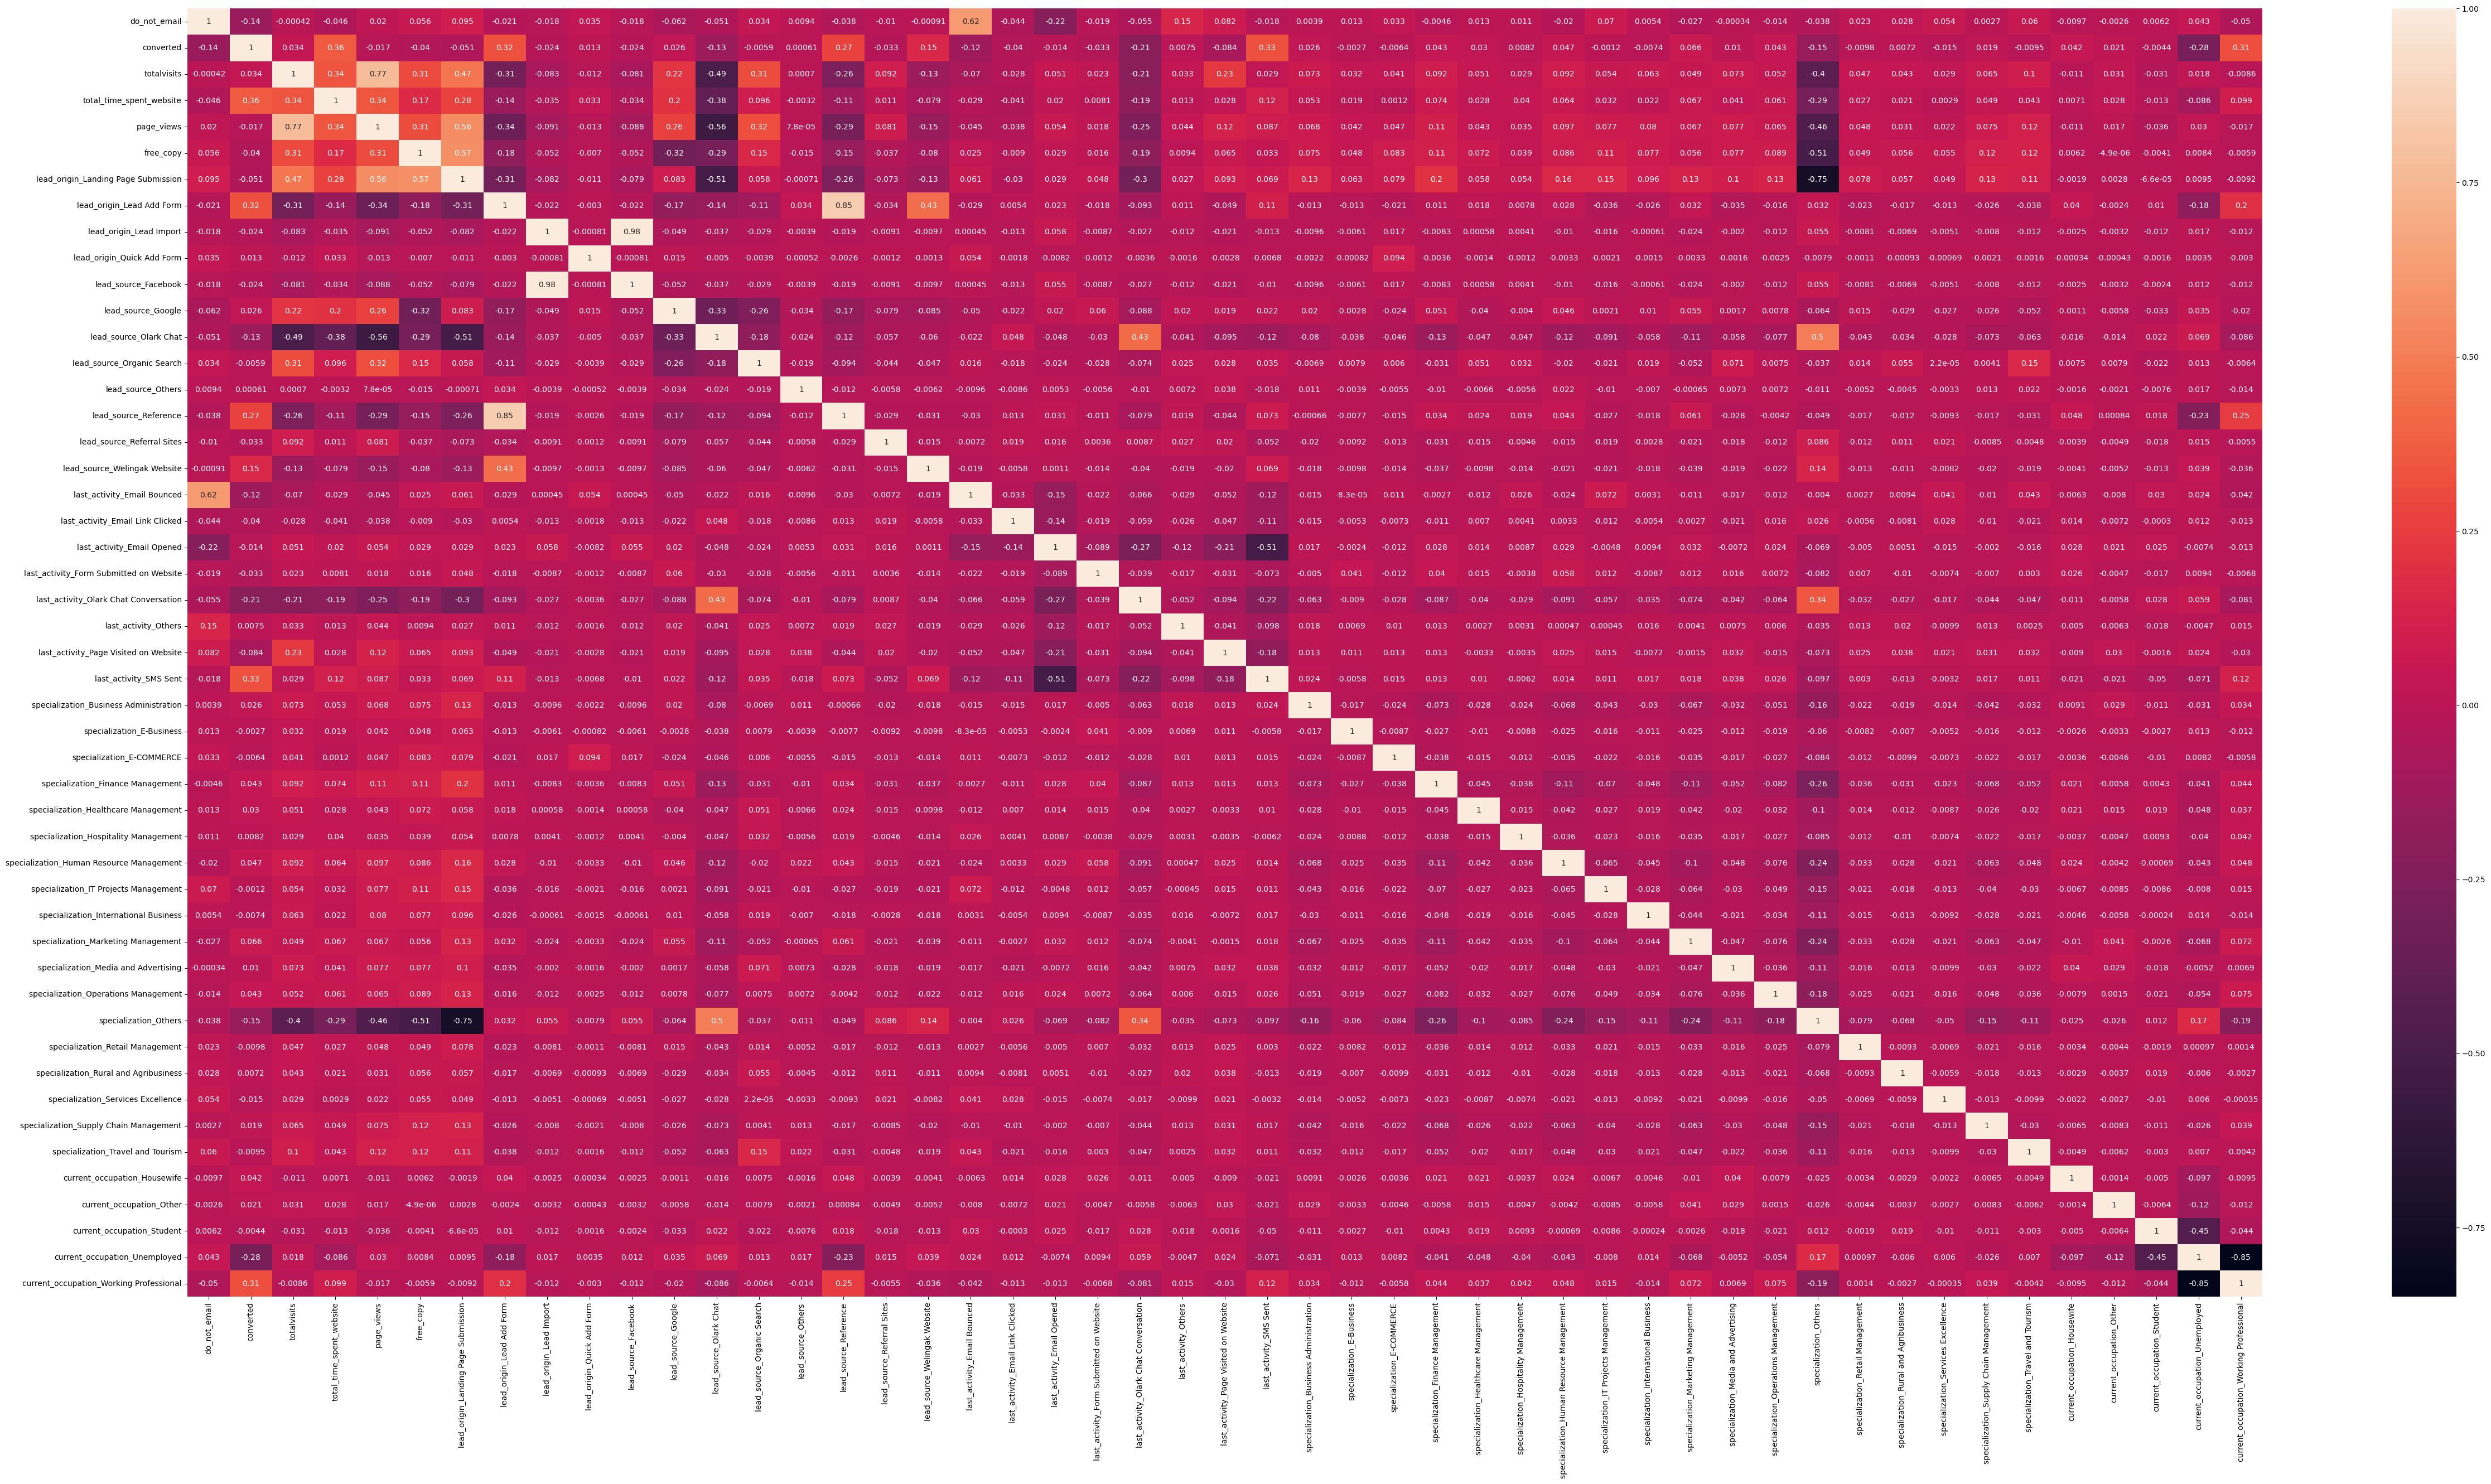

In [120]:
#Let's see the correlation matrix
plt.figure(figsize=(60,30))
sns.heatmap(df_leads.corr(),annot=True)
plt.show()

In [121]:
#Correlation with target variable 
corr_mat = df_leads.corr()
round(corr_mat,2)

do_not_email  converted  \
do_not_email                                      1.00      -0.14   
converted                                        -0.14       1.00   
totalvisits                                      -0.00       0.03   
total_time_spent_website                         -0.05       0.36   
page_views                                        0.02      -0.02   
free_copy                                         0.06      -0.04   
lead_origin_Landing Page Submission               0.10      -0.05   
lead_origin_Lead Add Form                        -0.02       0.32   
lead_origin_Lead Import                          -0.02      -0.02   
lead_origin_Quick Add Form                        0.04       0.01   
lead_source_Facebook                             -0.02      -0.02   
lead_source_Google                               -0.06       0.03   
lead_source_Olark Chat                           -0.05      -0.13   
lead_source_Organic Search                        0.03      -0.01   
lead_source_Others                                0.01       0.00   
lead_source_Reference                            -0.04       0.27   
lead_source_Referral Sites                       -0.01      -0.03   
lead_source_Welingak Website                     -0.00       0.15   
last_activity_Email Bounced                       0.62      -0.12   
last_activity_Email Link Clicked                 -0.04      -0.04   
last_activity_Email Opened                       -0.22      -0.01   
last_activity_Form Submitted on Website          -0.02      -0.03   
last_activity_Olark Chat Conversation            -0.06      -0.21   
last_activity_Others                              0.15       0.01   
last_activity_Page Visited on Website             0.08      -0.08   
last_activity_SMS Sent                           -0.02       0.33   
specialization_Business Administration            0.00       0.03   
specialization_E-Business                         0.01      -0.00   
specialization_E-COMMERCE                         0.03      -0.01   
specialization_Finance Management                -0.00       0.04   
specialization_Healthcare Management              0.01       0.03   
specialization_Hospitality Management             0.01       0.01   
specialization_Human Resource Management         -0.02       0.05   
specialization_IT Projects Management             0.07      -0.00   
specialization_International Business             0.01      -0.01   
specialization_Marketing Management              -0.03       0.07   
specialization_Media and Advertising             -0.00       0.01   
specialization_Operations Management             -0.01       0.04   
specialization_Others                            -0.04      -0.15   
specialization_Retail Management                  0.02      -0.01   
specialization_Rural and Agribusiness             0.03       0.01   
specialization_Services Excellence                0.05      -0.01   
specialization_Supply Chain Management            0.00       0.02   
specialization_Travel and Tourism                 0.06      -0.01   
current_occupation_Housewife                     -0.01       0.04   
current_occupation_Other                         -0.00       0.02   
current_occupation_Student                        0.01      -0.00   
current_occupation_Unemployed                     0.04      -0.28   
current_occupation_Working Professional          -0.05       0.31   

                                          totalvisits  \
do_not_email                                    -0.00   
converted                                        0.03   
totalvisits                                      1.00   
total_time_spent_website                         0.34   
page_views                                       0.77   
free_copy                                        0.31   
lead_origin_Landing Page Submission              0.47   
lead_origin_Lead Add Form                       -0.31   
lead_origin_Lead Import                         -0.08   
lead_origin_Quick Add

In [122]:
correlation_mat = df_leads.corr()
corr_pairs = correlation_mat.unstack()
print(corr_pairs)

do_not_email                             do_not_email                               1.000000
                                         converted                                 -0.135580
                                         totalvisits                               -0.000416
                                         total_time_spent_website                  -0.046374
                                         page_views                                 0.019838
                                                                                      ...   
current_occupation_Working Professional  current_occupation_Housewife              -0.009467
                                         current_occupation_Other                  -0.011979
                                         current_occupation_Student                -0.043862
                                         current_occupation_Unemployed             -0.849653
                                         current_occupation_Working Pr

In [123]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

current_occupation_Working Professional  current_occupation_Unemployed             -0.849653
current_occupation_Unemployed            current_occupation_Working Professional   -0.849653
lead_origin_Landing Page Submission      specialization_Others                     -0.748263
specialization_Others                    lead_origin_Landing Page Submission       -0.748263
page_views                               lead_source_Olark Chat                    -0.559423
                                                                                      ...   
specialization_E-COMMERCE                specialization_E-COMMERCE                  1.000000
specialization_E-Business                specialization_E-Business                  1.000000
specialization_Business Administration   specialization_Business Administration     1.000000
specialization_Marketing Management      specialization_Marketing Management        1.000000
current_occupation_Working Professional  current_occupation_Working Pr

In [124]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs)

current_occupation_Working Professional  current_occupation_Unemployed             -0.849653
current_occupation_Unemployed            current_occupation_Working Professional   -0.849653
lead_origin_Landing Page Submission      specialization_Others                     -0.748263
specialization_Others                    lead_origin_Landing Page Submission       -0.748263
page_views                               lead_source_Olark Chat                    -0.559423
                                                                                      ...   
specialization_E-COMMERCE                specialization_E-COMMERCE                  1.000000
specialization_E-Business                specialization_E-Business                  1.000000
specialization_Business Administration   specialization_Business Administration     1.000000
specialization_Marketing Management      specialization_Marketing Management        1.000000
current_occupation_Working Professional  current_occupation_Working Pr

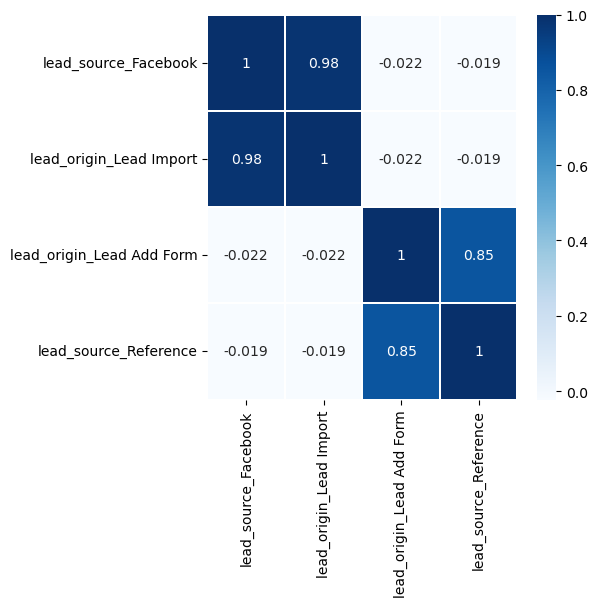

In [125]:
# Check high correlation with each other between 0.98 and 0.85
plt.figure(figsize = (5,5))        
sns.heatmap(df_leads[["lead_source_Facebook","lead_origin_Lead Import","lead_origin_Lead Add Form","lead_source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

<br><b>Dropping highly correlated dummy variables</b>

In [126]:
X_test = X_test.drop(["lead_origin_Lead Import","lead_origin_Lead Add Form"
                      ],1)
X_train = X_train.drop(["lead_origin_Lead Import","lead_origin_Lead Add Form"
                      ],1)

<b>After dropping highly correlated variables, check the correlation matrix again</b>

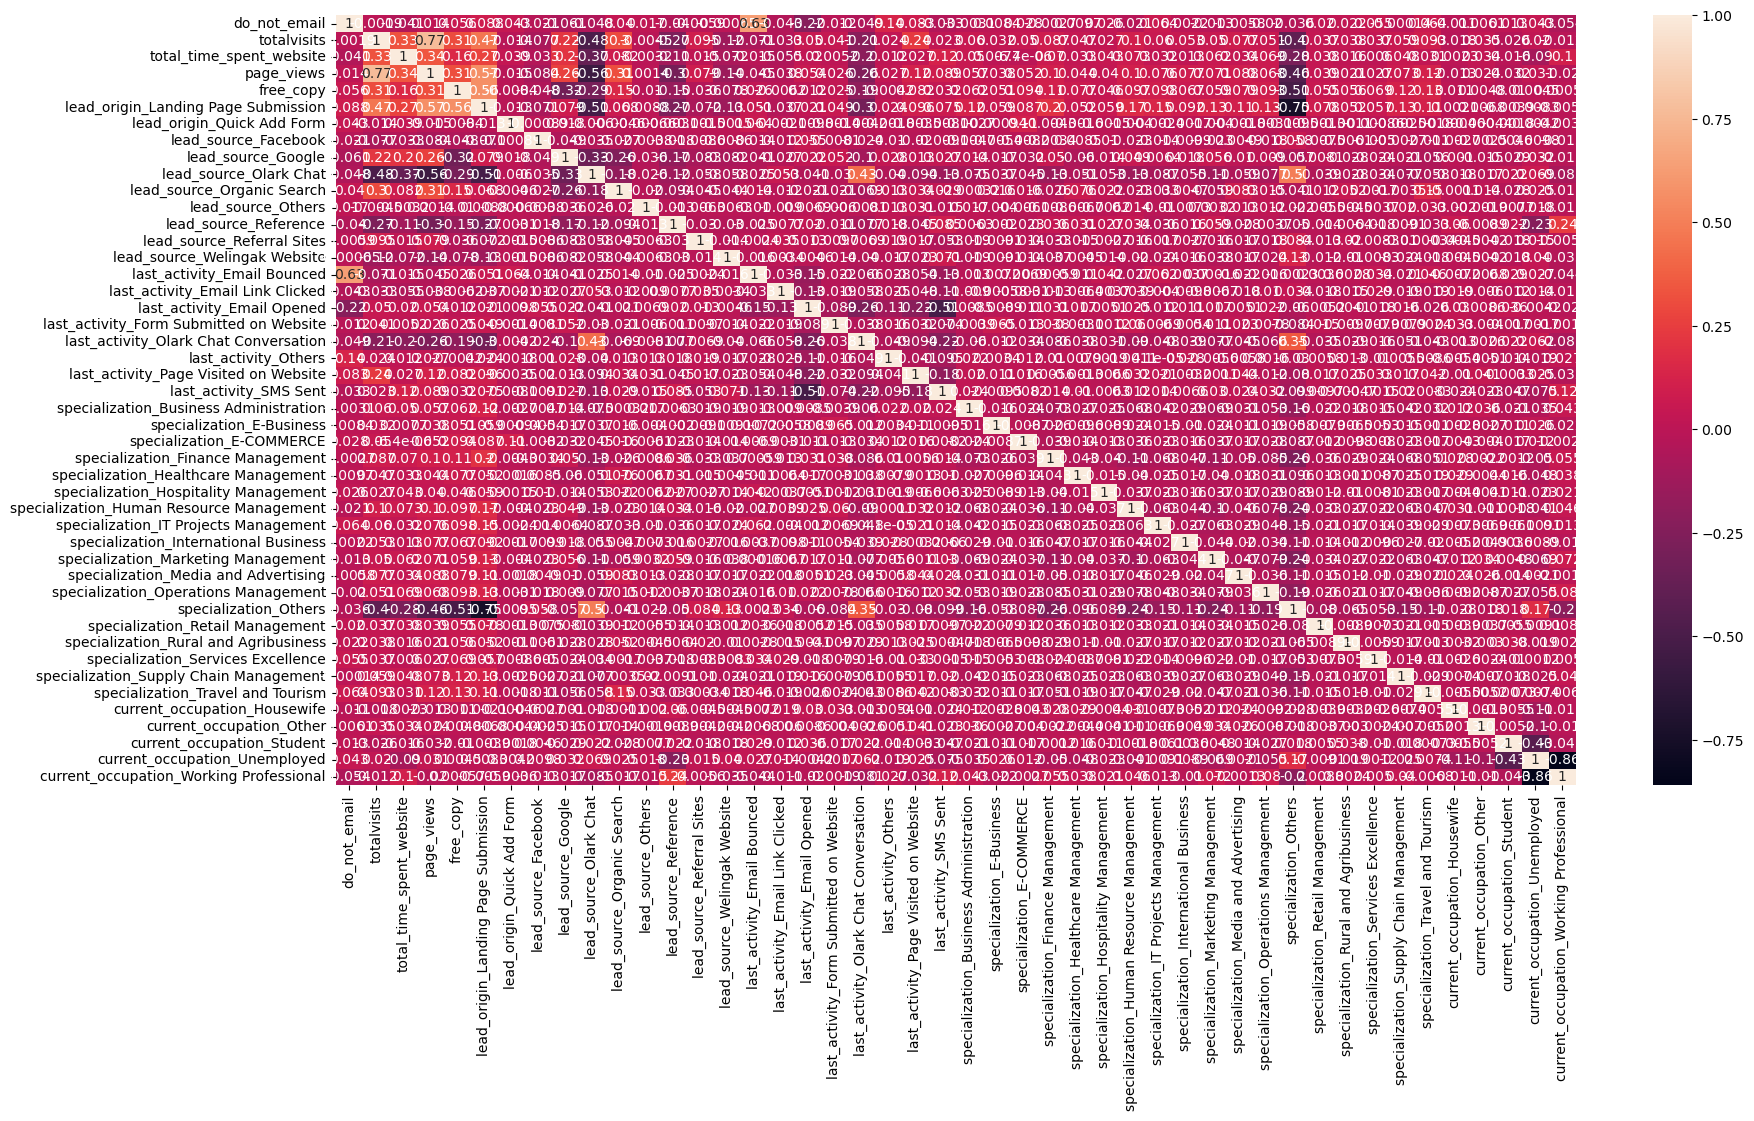

In [127]:
#Let's see the correlation matrix after dropping
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [128]:
X_train.dtypes

do_not_email                                  int64
totalvisits                                 float64
total_time_spent_website                    float64
page_views                                  float64
free_copy                                     int64
lead_origin_Landing Page Submission           uint8
lead_origin_Quick Add Form                    uint8
lead_source_Facebook                          uint8
lead_source_Google                            uint8
lead_source_Olark Chat                        uint8
lead_source_Organic Search                    uint8
lead_source_Others                            uint8
lead_source_Reference                         uint8
lead_source_Referral Sites                    uint8
lead_source_Welingak Website                  uint8
last_activity_Email Bounced                   uint8
last_activity_Email Link Clicked              uint8
last_activity_Email Opened                    uint8
last_activity_Form Submitted on Website       uint8
last_activit

# Model Building
###### Splitting data into a training set and a test set.

<b>Running First Training Model</b>

In [129]:
import statsmodels.api as sm

In [130]:
X_train.dtypes

do_not_email                                  int64
totalvisits                                 float64
total_time_spent_website                    float64
page_views                                  float64
free_copy                                     int64
lead_origin_Landing Page Submission           uint8
lead_origin_Quick Add Form                    uint8
lead_source_Facebook                          uint8
lead_source_Google                            uint8
lead_source_Olark Chat                        uint8
lead_source_Organic Search                    uint8
lead_source_Others                            uint8
lead_source_Reference                         uint8
lead_source_Referral Sites                    uint8
lead_source_Welingak Website                  uint8
last_activity_Email Bounced                   uint8
last_activity_Email Link Clicked              uint8
last_activity_Email Opened                    uint8
last_activity_Form Submitted on Website       uint8
last_activit

In [131]:
#<b>GLM</b>

In [132]:
# # Logistic regression model
# logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
# logm1.fit().sumWmary()

# Feature Selection Using RFE

In [133]:
# Importing RFE and LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [134]:
logreg = LogisticRegression()

In [135]:
#Org code error
#rfe = RFE(logreg, 15) #running RFE with 13 variables as output

n_features_to_select = 15
rfe = RFE(logreg, n_features_to_select=n_features_to_select)

rfe = rfe.fit(X_train,y_train)

In [136]:
rfe.support_

array([ True, False,  True, False, False,  True, False, False, False,
        True, False,  True,  True, False,  True, False, False,  True,
       False,  True,  True, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True])

In [137]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('do_not_email', True, 1),
 ('totalvisits', False, 10),
 ('total_time_spent_website', True, 1),
 ('page_views', False, 9),
 ('free_copy', False, 11),
 ('lead_origin_Landing Page Submission', True, 1),
 ('lead_origin_Quick Add Form', False, 18),
 ('lead_source_Facebook', False, 2),
 ('lead_source_Google', False, 22),
 ('lead_source_Olark Chat', True, 1),
 ('lead_source_Organic Search', False, 28),
 ('lead_source_Others', True, 1),
 ('lead_source_Reference', True, 1),
 ('lead_source_Referral Sites', False, 23),
 ('lead_source_Welingak Website', True, 1),
 ('last_activity_Email Bounced', False, 21),
 ('last_activity_Email Link Clicked', False, 12),
 ('last_activity_Email Opened', True, 1),
 ('last_activity_Form Submitted on Website', False, 29),
 ('last_activity_Olark Chat Conversation', True, 1),
 ('last_activity_Others', True, 1),
 ('last_activity_Page Visited on Website', False, 13),
 ('last_activity_SMS Sent', True, 1),
 ('specialization_Business Administration', False, 14),
 ('speci

In [138]:
col = X_train.columns[rfe.support_]
col

Index(['do_not_email', 'total_time_spent_website',
       'lead_origin_Landing Page Submission', 'lead_source_Olark Chat',
       'lead_source_Others', 'lead_source_Reference',
       'lead_source_Welingak Website', 'last_activity_Email Opened',
       'last_activity_Olark Chat Conversation', 'last_activity_Others',
       'last_activity_SMS Sent', 'specialization_Hospitality Management',
       'specialization_Others', 'current_occupation_Housewife',
       'current_occupation_Working Professional'],
      dtype='object')

In [139]:
X_train.columns[~rfe.support_]

Index(['totalvisits', 'page_views', 'free_copy', 'lead_origin_Quick Add Form',
       'lead_source_Facebook', 'lead_source_Google',
       'lead_source_Organic Search', 'lead_source_Referral Sites',
       'last_activity_Email Bounced', 'last_activity_Email Link Clicked',
       'last_activity_Form Submitted on Website',
       'last_activity_Page Visited on Website',
       'specialization_Business Administration', 'specialization_E-Business',
       'specialization_E-COMMERCE', 'specialization_Finance Management',
       'specialization_Healthcare Management',
       'specialization_Human Resource Management',
       'specialization_IT Projects Management',
       'specialization_International Business',
       'specialization_Marketing Management',
       'specialization_Media and Advertising',
       'specialization_Operations Management',
       'specialization_Retail Management',
       'specialization_Rural and Agribusiness',
       'specialization_Services Excellence',
       '

<br><b>Assessing the model with StatsModels</b>

<br><b>Model 1</b>

In [140]:
X_train_sm = sm.add_constant(X_train[col])

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train_sm)),family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2709.3
Date:                Mon, 21 Aug 2023   Deviance:                       5418.7
Time:                        22:55:06   Pearson chi2:                 8.20e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3883
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8805      0.145     -6.053      0.000      -1.166      -0.595
do_not_email                               -1.1132      0.170     -6.564      0.000      -1.446      -0.781
total_time_spent_website                    1.0475      0.039     26.995      0.000       0.971       1.124
lead_origin_Landing Page Submission        -1.2198      0.126     -9.701      0.000      -1.466      -0.973
lead_source_Olark Chat                      0.9285      0.118      7.843      0.000       0.696       1.161
lead_source_Others                          1.0847      0.519      2.091      0.036       0.068       2.101
lead_source_Reference                       2.9446      0.215     13.666      0.000       2.522       3.367
lead_source_Welingak Website                5.4864      0.732      7.496      0.000       4.052       6.921
last_activity_Email Opened                  0.7546      0.108      6.996      0.000       0.543       0.966
last_activity_Olark Chat Conversation      -0.7172      0.189     -3.797      0.000      -1.087      -0.347
last_activity_Others                        1.4156      0.244      5.800      0.000       0.937       1.894
last_activity_SMS Sent                      1.9419      0.110     17.727      0.000       1.727       2.157
specialization_Hospitality Management      -1.0606      0.323     -3.288      0.001      -1.693      -0.428
specialization_Others                      -1.1810      0.121     -9.737      0.000      -1.419      -0.943
current_occupation_Housewife               22.9673   1.33e+04      0.002      0.999   -2.61e+04    2.61e+04
current_occupation_Working Professional     2.6466      0.190     13.902      0.000       2.273       3.020
===========================================================================================================
"""

<b>`current_occupation_Housewife` can be dropped because of high p-value 0.999</b>

In [141]:
col = col.drop('current_occupation_Housewife',1)
col

Index(['do_not_email', 'total_time_spent_website',
       'lead_origin_Landing Page Submission', 'lead_source_Olark Chat',
       'lead_source_Others', 'lead_source_Reference',
       'lead_source_Welingak Website', 'last_activity_Email Opened',
       'last_activity_Olark Chat Conversation', 'last_activity_Others',
       'last_activity_SMS Sent', 'specialization_Hospitality Management',
       'specialization_Others', 'current_occupation_Working Professional'],
      dtype='object')

<br><b>Model 2</b>

In [142]:
#Re-run the model using selected variables 
X_train_sm = sm.add_constant(X_train[col])

# Logistic regression model
logm2 = sm.GLM(y_train,(sm.add_constant(X_train_sm)),family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2716.7
Date:                Mon, 21 Aug 2023   Deviance:                       5433.3
Time:                        22:55:06   Pearson chi2:                 8.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3870
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8723      0.145     -6.007      0.000      -1.157      -0.588
do_not_email                               -1.1179      0.169     -6.595      0.000      -1.450      -0.786
total_time_spent_website                    1.0463      0.039     27.002      0.000       0.970       1.122
lead_origin_Landing Page Submission        -1.2148      0.126     -9.669      0.000      -1.461      -0.969
lead_source_Olark Chat                      0.9276      0.118      7.839      0.000       0.696       1.160
lead_source_Others                          1.0785      0.519      2.080      0.038       0.062       2.095
lead_source_Reference                       2.9629      0.215     13.768      0.000       2.541       3.385
lead_source_Welingak Website                5.4864      0.732      7.496      0.000       4.052       6.921
last_activity_Email Opened                  0.7527      0.108      7.001      0.000       0.542       0.963
last_activity_Olark Chat Conversation      -0.7224      0.189     -3.828      0.000      -1.092      -0.352
last_activity_Others                        1.4069      0.244      5.768      0.000       0.929       1.885
last_activity_SMS Sent                      1.9320      0.109     17.685      0.000       1.718       2.146
specialization_Hospitality Management      -1.0676      0.322     -3.310      0.001      -1.700      -0.436
specialization_Others                      -1.1849      0.121     -9.774      0.000      -1.422      -0.947
current_occupation_Working Professional     2.6386      0.190     13.865      0.000       2.266       3.012
===========================================================================================================
"""

<br><b> Checking VIFs </b>

In [143]:
# check for VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [144]:
# Create a Dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2       lead_origin_Landing Page Submission  2.78
12                    specialization_Others  2.58
7                last_activity_Email Opened  2.53
10                   last_activity_SMS Sent  2.26
3                    lead_source_Olark Chat  2.15
8     last_activity_Olark Chat Conversation  1.75
5                     lead_source_Reference  1.32
1                  total_time_spent_website  1.25
13  current_occupation_Working Professional  1.21
0                              do_not_email  1.20
6              lead_source_Welingak Website  1.09
9                      last_activity_Others  1.09
11    specialization_Hospitality Management  1.02
4                        lead_source_Others  1.00

<br> 
- Good VIF values less than 5 <br>
- All variables of p-values is less than 0.05 <br>
- Choose Model 2 for Model Evaluation

In [145]:
# # Getting the predicted values on the train set
# y_train_pred =res.predict(X_train_sm)
# y_train_pred[:10]

In [146]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.47043941, 0.0749365 , 0.24968468, 0.78131853, 0.2136214 ,
       0.98825713, 0.10929108, 0.99716422, 0.19415693, 0.87444095])

<br><b><i>Creating a Dataframe with actual and the predicted probabilities </b></i>

In [147]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID']= y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.470439         1871
1          0        0.074936         6795
2          0        0.249685         3516
3          0        0.781319         8105
4          0        0.213621         3934

In [148]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted
0          0        0.470439         1871          0
1          0        0.074936         6795          0
2          0        0.249685         3516          0
3          0        0.781319         8105          1
4          0        0.213621         3934          0

In [149]:
from sklearn import metrics

In [150]:
# Confustion matric
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3586  416]
 [ 839 1627]]


In [151]:
# Predicted     not_Converted      Converted
# Actual 
# not_Converted      3586            416
# Converted           839            416

<b><i>Accuracy</i></b>

In [152]:
#Check overall accuracy for train set
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.8059678416821274


<br><b>Metrics beyond simply accuracy</b>

In [153]:
TP = confusion[1,1]  # True Positive (TP)
TN = confusion[0,0]  # True Negative (TN)
FP = confusion[0,1]  # False Positive (FP)
FN = confusion[1,0]  # False Negative (FN)

In [154]:
print('Sensitivity: ', TP /float(TP+FN))
print('Specificity: ', TN /float(TN+FP))
print('False Positve rate: ',FP/float(TN+FP))
print('False Positve rate from speciifcity: ', 1 - (TN /float(TN+FP)))
print('Positve predictive rate: ',TP/float(TP+FP))
print('Negative predictive rate: ',TN/float(TN+FN))

Sensitivity:  0.6597729115977291
Specificity:  0.8960519740129935
False Positve rate:  0.10394802598700649
False Positve rate from speciifcity:  0.10394802598700648
Positve predictive rate:  0.7963778756730299
Negative predictive rate:  0.8103954802259887


# Plotting the ROC Curve

ROC

In [155]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [156]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

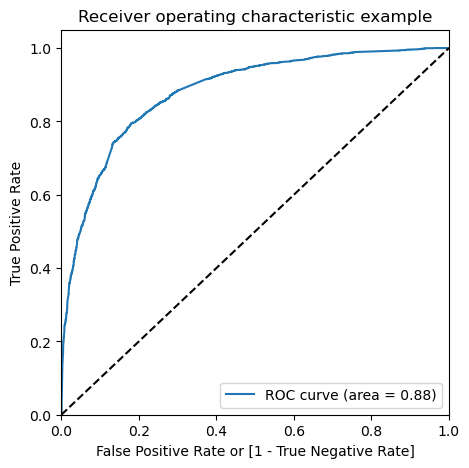

In [157]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

<br>ROC curve is 0.88 < 1 which indicates a good predictive model

In [158]:
y_train_pred_final

Converted  Converted_Prob  Prospect ID  predicted
0             0        0.470439         1871          0
1             0        0.074936         6795          0
2             0        0.249685         3516          0
3             0        0.781319         8105          1
4             0        0.213621         3934          0
...         ...             ...          ...        ...
6463          1        0.259999          350          0
6464          1        0.992137           79          1
6465          1        0.213621         8039          0
6466          0        0.071904         6936          0
6467          0        0.213621         5640          0

[6468 rows x 4 columns]

# Finding Optimal Cutoff Point

<br>Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [159]:
#Create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Converted_Prob.map(lambda x: 1 if x >i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.470439         1871          0    1    1    1    1    1   
1          0        0.074936         6795          0    1    0    0    0    0   
2          0        0.249685         3516          0    1    1    1    0    0   
3          0        0.781319         8105          1    1    1    1    1    1   
4          0        0.213621         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    0    0    0    0    0

In [160]:
#Calculate accuracy sensitivity and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

# TP = confusion[1,1]  # True Positive (TP)
# TN = confusion[0,0]  # True Negative (TN)
# FP = confusion[0,1]  # False Positive (FP)
# FN = confusion[1,0]  # False Negative (FN)

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cml = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total1=sum(sum(cml))
    
    accuracy = (cml[0,0]+cml[1,1])/total1
    
    speci = cml[0,0]/(cml[0,0]+cml[0,1])
    sensi = cml[1,1]/(cml[1,0]+cml[1,1])
    cutoff_df.loc[i]=[i,accuracy,sensi,speci]
    
print(cutoff_df)  
    

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.588590  0.974047  0.351074
0.2   0.2  0.729128  0.918086  0.612694
0.3   0.3  0.790971  0.837794  0.762119
0.4   0.4  0.811688  0.768856  0.838081
0.5   0.5  0.805968  0.659773  0.896052
0.6   0.6  0.797310  0.594485  0.922289
0.7   0.7  0.782777  0.513788  0.948526
0.8   0.8  0.754174  0.405109  0.969265
0.9   0.9  0.707638  0.248581  0.990505


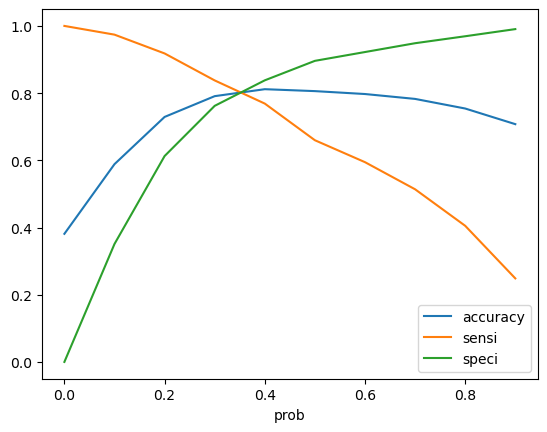

In [161]:
#A plot accuracy sensitivity and speificity for various probabilities.
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

<br><b>From the curve above, 0.35 is the optimum point to take it as a cutoff probability</b>

In [162]:

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.470439         1871          0    1    1    1    1    1   
1          0        0.074936         6795          0    1    0    0    0    0   
2          0        0.249685         3516          0    1    1    1    0    0   
3          0        0.781319         8105          1    1    1    1    1    1   
4          0        0.213621         3934          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    0    0  
4    0    0    0    0    0

In [163]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted
0          0        0.470439         1871          1
1          0        0.074936         6795          0
2          0        0.249685         3516          0
3          0        0.781319         8105          1
4          0        0.213621         3934          0

In [164]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8045763760049475

<br><br><b>Precision and Recall</b>

In [165]:
# Confustion matric again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
confusion

array([[3223,  779],
       [ 485, 1981]], dtype=int64)

<br><b><i>Precision</i></b>

TP / TP + FP

In [166]:
confusion[1,1]/(confusion[1,1]+confusion[0,1])

0.7177536231884057

<br><b><i>Recall</i></b>

TP / TP + FN

In [167]:
confusion[1,1]/(confusion[1,1]+confusion[1,0])

0.8033252230332523

<br> using sklearn utilities for the same

In [168]:
from sklearn.metrics import precision_score,recall_score

In [169]:
precision_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.7177536231884057

In [170]:
recall_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.8033252230332523

<br><b>Precision and Recall tradeoff</b>

In [171]:
from sklearn.metrics import precision_recall_curve

In [172]:
y_train_pred_final.Converted,y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [173]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob)

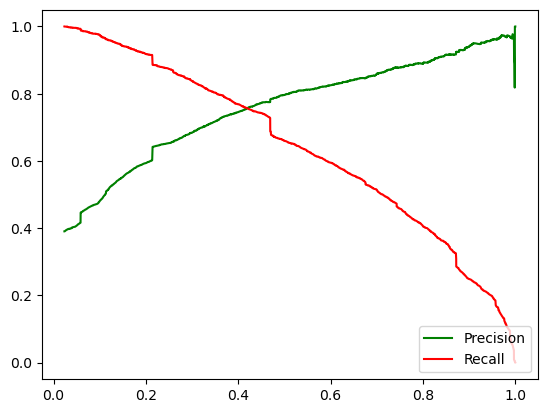

In [174]:
plt.plot(thresholds, p[:-1],'g-', label="Precision") #green
plt.plot(thresholds, r[:-1], 'r-', label="Recall") # red
plt.legend(loc='lower right')

plt.show()

<br>

In [175]:
# Copy df to test model evaluation with precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()

In [176]:
y_train_precision_recall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Converted       6468 non-null   int64  
 1   Converted_Prob  6468 non-null   float64
 2   Prospect ID     6468 non-null   int64  
 3   predicted       6468 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 202.2 KB


In [177]:
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall.Converted_Prob.map(lambda x: 1 if x > 0.41 else 0)

In [178]:
y_train_precision_recall.head()

Converted  Converted_Prob  Prospect ID  predicted  \
0          0        0.470439         1871          1   
1          0        0.074936         6795          0   
2          0        0.249685         3516          0   
3          0        0.781319         8105          1   
4          0        0.213621         3934          0   

   precision_recall_prediction  
0                            1  
1                            0  
2                            0  
3                            1  
4                            0

# Making predictions on the test set

In [179]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   do_not_email                              2772 non-null   int64  
 1   totalvisits                               2772 non-null   float64
 2   total_time_spent_website                  2772 non-null   int64  
 3   page_views                                2772 non-null   float64
 4   free_copy                                 2772 non-null   int64  
 5   lead_origin_Landing Page Submission       2772 non-null   uint8  
 6   lead_origin_Quick Add Form                2772 non-null   uint8  
 7   lead_source_Facebook                      2772 non-null   uint8  
 8   lead_source_Google                        2772 non-null   uint8  
 9   lead_source_Olark Chat                    2772 non-null   uint8  
 10  lead_source_Organic Search       

In [180]:
X_test [['totalvisits', 'total_time_spent_website', 'page_views']] = scaler.fit_transform(X_test[['totalvisits', 'total_time_spent_website', 'page_views']])

X_test.head()

do_not_email  totalvisits  total_time_spent_website  page_views  \
4269             0     1.737951                  0.933036    2.067597   
2376             0    -1.130522                 -0.900812   -1.240584   
7766             0     0.662274                 -0.793792    1.516234   
9199             0    -1.130522                 -0.900812   -1.240584   
4359             0    -1.130522                 -0.900812   -1.240584   

      free_copy  lead_origin_Landing Page Submission  \
4269          0                                    0   
2376          0                                    0   
7766          0                                    0   
9199          0                                    0   
4359          0                                    0   

      lead_origin_Quick Add Form  lead_source_Facebook  lead_source_Google  \
4269                           0                     0                   0   
2376                           0                     0                   0   
7766                           0                     0                   1   
9199                           0                     0                   0   
4359                           0                     0                   0   

      lead_source_Olark Chat  ...  specialization_Retail Management  \
4269                       0  ...                                 0   
2376                       0  ...                                 0   
7766                       0  ...                                 0   
9199                       1  ...                                 0   
4359                       0  ...                                 0   

      specialization_Rural and Agribusiness  \
4269                                      0   
2376                                      0   
7766                                      0   
9199                                      0   
4359                                      0   

      specialization_Services Excellence  \
4269                                   0   
2376                                   0   
7766                                   0   
9199                                   0   
4359                                   0   

      specialization_Supply Chain Management  \
4269                                       0   
2376                                       0   
7766                                       1   
9199                                       0   
4359                                       0   

      specialization_Travel and Tourism  current_occupation_Housewife  \
4269                                  0                             0   
2376                                  0                             0   
7766                                  0                             0   
9199                                  0                             0   
4359                                  0                             0   

      current_occupation_Other  current_occupation_Student  \
4269                         0                           0   
2376                         0                           0   
7766                         0                           0   
9199                         0                           0   
4359                         0                           0   

      current_occupation_Unemployed  current_occupation_Working Professional  
4269                              1                                        0  
2376                              1                                        0  
7766                              0                                        1  
9199                              1                                        0  
4359                              1                                        0  

[5 rows x 46 columns]

In [181]:
X_test = X_test[col]
X_test.head()

do_not_email  total_time_spent_website  \
4269             0                  0.933036   
2376             0                 -0.900812   
7766             0                 -0.793792   
9199             0                 -0.900812   
4359             0                 -0.900812   

      lead_origin_Landing Page Submission  lead_source_Olark Chat  \
4269                                    0                       0   
2376                                    0                       0   
7766                                    0                       0   
9199                                    0                       1   
4359                                    0                       0   

      lead_source_Others  lead_source_Reference  lead_source_Welingak Website  \
4269                   0                      0                             0   
2376                   0                      1                             0   
7766                   0                      0                             0   
9199                   0                      0                             0   
4359                   0                      1                             0   

      last_activity_Email Opened  last_activity_Olark Chat Conversation  \
4269                           0                                      0   
2376                           0                                      0   
7766                           0                                      0   
9199                           0                                      1   
4359                           1                                      0   

      last_activity_Others  last_activity_SMS Sent  \
4269                     0                       1   
2376                     0                       1   
7766                     1                       0   
9199                     0                       0   
4359                     0                       0   

      specialization_Hospitality Management  specialization_Others  \
4269                                      0                      1   
2376                                      0                      1   
7766                                      0                      0   
9199                                      0                      1   
4359                                      0                      0   

      current_occupation_Working Professional  
4269                                        0  
2376                                        0  
7766                                        1  
9199                                        0  
4359                                        0

In [182]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [183]:
y_test_pred = res.predict(X_test_sm)

In [184]:
y_test_pred[:10]

4269    0.700792
2376    0.869349
7766    0.912346
9199    0.057623
4359    0.869984
9186    0.515967
1631    0.412342
8963    0.149524
8007    0.084965
5324    0.311316
dtype: float64

In [185]:
#Converting y_pred to Dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

0
4269  0.700792
2376  0.869349
7766  0.912346
9199  0.057623
4359  0.869984

In [186]:
#Converting y_test to Dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

converted
4269          1
2376          1
7766          1
9199          0
4359          1

In [187]:
#Putting ProspectID to index
y_test_df['Prospect ID'] = y_test_df.index

In [188]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [189]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

converted  Prospect ID         0
0          1         4269  0.700792
1          1         2376  0.869349
2          1         7766  0.912346
3          0         9199  0.057623
4          1         4359  0.869984

In [190]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 'converted': 'Converted',0 : 'Converted_Prob'})
y_pred_final.head()

Converted  Prospect ID  Converted_Prob
0          1         4269        0.700792
1          1         2376        0.869349
2          1         7766        0.912346
3          0         9199        0.057623
4          1         4359        0.869984

In [191]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.700792
1         2376          1        0.869349
2         7766          1        0.912346
3         9199          0        0.057623
4         4359          1        0.869984

In [192]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.700792                1
1         2376          1        0.869349                1
2         7766          1        0.912346                1
3         9199          0        0.057623                0
4         4359          1        0.869984                1

In [193]:
#Check overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8091630591630592

In [194]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID']= y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.470439         1871
1          0        0.074936         6795
2          0        0.249685         3516
3          0        0.781319         8105
4          0        0.213621         3934

In [195]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

converted  Prospect ID         0
0          1         4269  0.700792
1          1         2376  0.869349
2          1         7766  0.912346
3          0         9199  0.057623
4          1         4359  0.869984

In [196]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 'converted': 'Converted',0 : 'Converted_Prob'})
y_pred_final.head()

Converted  Prospect ID  Converted_Prob
0          1         4269        0.700792
1          1         2376        0.869349
2          1         7766        0.912346
3          0         9199        0.057623
4          1         4359        0.869984

In [197]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         4269          1        0.700792
1         2376          1        0.869349
2         7766          1        0.912346
3         9199          0        0.057623
4         4359          1        0.869984

In [198]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         4269          1        0.700792                1
1         2376          1        0.869349                1
2         7766          1        0.912346                1
3         9199          0        0.057623                0
4         4359          1        0.869984                1

In [199]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Converted_Prob, drop_intermediate = False )

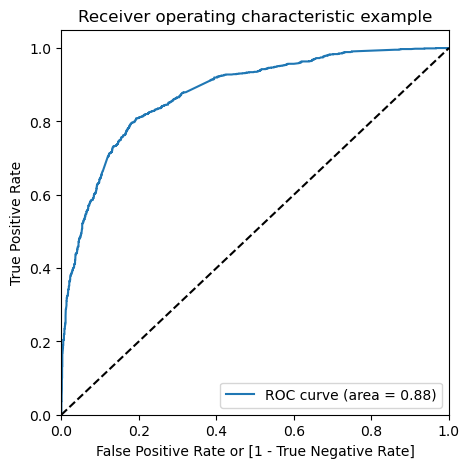

In [200]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Prob)

<br>ROC curve is 0.88 < 1 which indicates a good predictive model

In [201]:
y_pred_final

Prospect ID  Converted  Converted_Prob  final_predicted
0            4269          1        0.700792                1
1            2376          1        0.869349                1
2            7766          1        0.912346                1
3            9199          0        0.057623                0
4            4359          1        0.869984                1
...           ...        ...             ...              ...
2767         8649          0        0.077328                0
2768         2152          1        0.255835                0
2769         7101          0        0.210920                0
2770         5331          0        0.250563                0
2771         2960          1        0.869349                1

[2772 rows x 4 columns]

In [202]:
#Check overall accuracy for X_test
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8091630591630592

In [203]:
# Confustion matric
confusion2 = metrics.confusion_matrix(y_pred_final.Converted,y_pred_final.final_predicted)
print(confusion2)

[[1372  305]
 [ 224  871]]


In [204]:
# Predicted     not_Converted      Converted
# Actual 
# not_Converted      1372            305
# Converted           224            871

<br><b>Metrics beyond simply accuracy</b>

In [205]:
TP = confusion2[1,1]  # True Positive (TP)
TN = confusion2[0,0]  # True Negative (TN)
FP = confusion2[0,1]  # False Positive (FP)
FN = confusion2[1,0]  # False Negative (FN)

In [206]:
print('Sensitivity: ', TP /float(TP+FN))
print('Specificity: ', TN /float(TN+FP))
print('False Positve rate: ',FP/float(TN+FP))
print('False Positve rate from speciifcity: ', 1 - (TN /float(TN+FP)))
print('Positve predictive rate: ',TP/float(TP+FP))
print('Negative predictive rate: ',TN/float(TN+FN))

Sensitivity:  0.7954337899543379
Specificity:  0.8181276088252832
False Positve rate:  0.18187239117471676
False Positve rate from speciifcity:  0.18187239117471676
Positve predictive rate:  0.7406462585034014
Negative predictive rate:  0.8596491228070176


In [207]:
# features and their coefficicent from final model
parameters=res.params.sort_values(ascending=False).round(decimals=3)
parameters

lead_source_Welingak Website               5.486
lead_source_Reference                      2.963
current_occupation_Working Professional    2.639
last_activity_SMS Sent                     1.932
last_activity_Others                       1.407
lead_source_Others                         1.078
total_time_spent_website                   1.046
lead_source_Olark Chat                     0.928
last_activity_Email Opened                 0.753
last_activity_Olark Chat Conversation     -0.722
const                                     -0.872
specialization_Hospitality Management     -1.068
do_not_email                              -1.118
specialization_Others                     -1.185
lead_origin_Landing Page Submission       -1.215
dtype: float64

In [208]:
len(parameters)

15

# Conclusion

## Train - Test

<b>Train Dataset</b></br>
Accuracy: 0.81% </br>
Sensitivity:  0.66%</br>
Specificity:  0.89%

<b>Test Dataset</b></br>
Accuracy: 0.81% </br>
Sensitivity:  0.80% </br>
Specificity:  0.82%</br>


The final Logistic Regression Model has <b>15 features</b></br>

<b>Top three Features:</b></br>
1. lead_source_Welingak Website             
2. lead_source_Reference                     
3. current_occupation_Working Professional    